### Question 1: [IPO] Withdrawn IPOs by Company Type

What is the total withdrawn IPO value (in $ millions) for the company class with the highest total withdrawal value?

From the withdrawn IPO list (https://stockanalysis.com/ipos/withdrawn), collect and process the data to find out which company type saw the most withdrawn IPO value.

* Step 1: Use pandas.read_html() with the URL above to load the IPO withdrawal table into a DataFrame. It is a similar process to Code Snippet 1 discussed at the livestream. You should get 99 entries

In [ ]:
import pandas as pd
import requests
from io import StringIO

url = 'https://stockanalysis.com/ipos/withdrawn/'

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
                  "AppleWebKit/537.36 (KHTML, like Gecko)"
                  "Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)
response = StringIO(response.text)
df = pd.read_html(response)[0]
df

Empty DataFrame
Columns: [Symbol, Company Name, Price Range, Shares Offered]
Index: []

from bs4 import BeautifulSoup,
*soup = BeautifulSoup(response.content, 'html.parser'),
*tables = pd.read_html(str(soup))
*df = tables[0]

Step 2:
* Create a new column called Company Class, categorizing company names based on patterns like:
- ‚ÄúAcquisition Corp‚Äù or ‚ÄúAcquisition Corporation‚Äù ‚Üí Acq.Corp
- ‚ÄúInc‚Äù or ‚ÄúIncorporated‚Äù ‚Üí Inc
- ‚ÄúGroup‚Äù ‚Üí Group
- ‚ÄúLtd‚Äù or ‚ÄúLimited‚Äù ‚Üí Limited
- ‚ÄúHoldings‚Äù ‚Üí Holdings
- Others ‚Üí Other

Order: Please follow the listed order of classes and assign the first matched value (e.g., for 'shenni holdings limited', you assign the 'Limited' class).

Hint: make your function more robust by converting names to lowercase and splitting into words before matching patterns.

In [ ]:
def classify_company(company_name):
    """
    Classify company names based on specific patterns.
    Returns the first matching classification in order of priority.
    """
    if pd.isna(company_name):
        return 'Other'

    # Convert to lowercase and remove punctuation for robust matching
    import re
    name_lower = company_name.lower()
    # Remove punctuation and extra spaces
    name_clean = re.sub(r'[^\w\s]', ' ', name_lower)
    words = name_clean.split()

    # Also check the original string for pattern matching
    name_lower_original = name_lower.strip()

    # Check patterns in the specified order
    # 1. Acquisition Corp patterns
    acquisition_terms = ['acquisition']
    corp_terms = ['corp', 'corporation']
    if any(term in words for term in acquisition_terms) and \
       any(term in words for term in corp_terms):
        return 'Acq.Corp'

    # 2. Inc patterns (check for inc, inc., incorporated)
    inc_terms = ['inc', 'incorporated']
    if any(term in words for term in inc_terms) or \
       name_lower_original.endswith('inc.') or \
       name_lower_original.endswith('inc'):
        return 'Inc'

    # 3. Group patterns
    if 'group' in words:
        return 'Group'

    # 4. Limited patterns (check for ltd, ltd., limited)
    limited_terms = ['ltd', 'limited']
    if any(term in words for term in limited_terms) or \
       name_lower_original.endswith('ltd.') or \
       name_lower_original.endswith('ltd'):
        return 'Limited'

    # 5. Holdings patterns
    if 'holdings' in words:
        return 'Holdings'

    # 6. Default to Other
    return 'Other'

# Apply the function to create the new column
df['Company Class'] = df['Company Name'].apply(classify_company)


In [ ]:
#df.sample(10)

Step 3:
Define a new field Avg. price by parsing the Price Range field (create a function and apply it to the Price Range column). Examples:
* '$8.00-$10.00' ‚Üí 9.0
* '$5.00' ‚Üí 5.0
* '-' ‚Üí None

In [ ]:
def parse_avg_price(price_range):
    """
    Parses the Price Range string and returns the average price as a float.
    Handles:
    - '$8.00 - $10.00' ‚Üí 9.0
    - '$5.00' ‚Üí 5.0
    - '-' ‚Üí None
    - '-' or invalid ‚Üí None
    """
    import re
    if pd.isna(price_range) or price_range.strip() == '-':
        return None

    # Extract all numbers from the string
    prices = re.findall(r'\$?(\d+(?:\.\d+)?)', price_range)

    if not prices:
        return None

    # Convert to float
    prices = [float(p) for p in prices]

    # Return the average
    return sum(prices) / len(prices)

# Apply the function to create the new column
df['Avg. price'] = df['Price Range'].apply(parse_avg_price)

Step 4:
Convert Shares Offered to numeric, clean missing or invalid values.

In [ ]:
df['Shares Offered'] = pd.to_numeric(df['Shares Offered'], errors='coerce')
df['Shares Offered'].dtype

dtype('float64')

In [ ]:
# drop all NaNs
df = df.dropna()

Step 5: Create a new column:
```Withdrawn Value = Shares Offered * Avg Price (71 non-null values)```

In [ ]:
df.loc[:, 'Withdrawn Value'] = df['Shares Offered'] * df['Avg. price']
df

<ipython-input-8-3584859480>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Withdrawn Value'] = df['Shares Offered'] * df['Avg. price']


Symbol                                       Company Name      Price Range  \
1    UNFL                             Unifoil Holdings, Inc.    $3.00 - $4.00   
5    HPOT  The Great Restaurant Development Holdings Limited    $4.00 - $6.00   
6    CABR                                Caring Brands, Inc.            $4.00   
7    SQVI                             Sequoia Vaccines, Inc.   $8.00 - $10.00   
8     SNI                            Shenni Holdings Limited    $4.00 - $6.00   
..    ...                                                ...              ...   
92   DPAC                     Deep Space Acquisition Corp. I           $10.00   
93    GIF                                  GigCapital6, Inc.           $10.00   
94   HYIV                      Haymaker Acquisition Corp. IV           $10.00   
97   IFIT                         iFIT Health & Fitness Inc.  $18.00 - $21.00   
99    HCG                                      hear.com N.V.  $17.00 - $20.00   

    Shares Offered Company Class  Avg. price  Withdrawn Value  
1        2000000.0           Inc         3.5        7000000.0  
5        1400000.0       Limited         5.0        7000000.0  
6         750000.0           Inc         4.0        3000000.0  
7        2775000.0           Inc         9.0       24975000.0  
8        3000000.0       Limited         5.0       15000000.0  
..             ...           ...         ...              ...  
92      21000000.0      Acq.Corp        10.0      210000000.0  
93      20000000.0           Inc        10.0      200000000.0  
94      26100000.0      Acq.Corp        10.0      261000000.0  
97      30769231.0           Inc        19.5      600000004.5  
99      16220000.0         Other        18.5      300070000.0  

[71 rows x 7 columns]

Step 6: Group by ```Company Class``` and calculate total withdrawn value.

In [ ]:
company_class_withdrawal = df.groupby('Company Class')['Withdrawn Value'].sum()
company_class_withdrawal

Company Class
Acq.Corp    4.021000e+09
Group       3.378750e+07
Holdings    7.500000e+07
Inc         2.257164e+09
Limited     5.497346e+08
Other       7.679200e+08
Name: Withdrawn Value, dtype: float64

Step 7: Which class had the highest total value of withdrawals

In [ ]:
company_class_withdrawal.sort_values(ascending=False)

Company Class
Acq.Corp    4.021000e+09
Inc         2.257164e+09
Other       7.679200e+08
Limited     5.497346e+08
Holdings    7.500000e+07
Group       3.378750e+07
Name: Withdrawn Value, dtype: float64

### Question 2: [IPO] Median Sharpe Ratio for 2024 IPOs (First 5 Months)
**What is the median Sharpe ratio (as of 6 June 2025) for companies that went public in the first 5 months of 2024?**

The goal is to replicate the large-scale yfinance OHLCV data download and perform basic financial calculations on IPO stocks.

Step 1: Using the same approach as in Question 1, download the IPOs in 2024 from:
https://stockanalysis.com/ipos/2024/
Filter to keep only those IPOs before 1 June 2024 (first 5 months of 2024).
‚û§ You should have 75 tickers.

In [5]:
import pandas as pd
import requests
from io import StringIO

url = 'https://stockanalysis.com/ipos/2024/'

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
                  "AppleWebKit/537.36 (KHTML, like Gecko)"
                  "Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)
response = StringIO(response.text)
df_2024 = pd.read_html(response)[0]
df_2024.head()

IPO Date Symbol                                 Company Name IPO Price  \
0  Dec 31, 2024   ONEG                OneConstruction Group Limited     $4.00   
1  Dec 27, 2024    PHH      Park Ha Biological Technology Co., Ltd.     $4.00   
2  Dec 23, 2024    HIT                         Health In Tech, Inc.     $4.00   
3  Dec 23, 2024   TDAC  Translational Development Acquisition Corp.    $10.00   
4  Dec 20, 2024   RANG              Range Capital Acquisition Corp.    $10.00   

  Current   Return  
0   $4.82   20.55%  
1  $23.95  498.75%  
2   $0.60  -85.00%  
3  $10.26    2.60%  
4  $10.20    2.00%

In [6]:
# Ensure IPO Date is in datetime format
df_2024['IPO Date'] = pd.to_datetime(df_2024['IPO Date'], errors='coerce')

In [7]:
# set IPO Date as index
df_2024 = df_2024.set_index('IPO Date')

In [8]:
# check for duplicates
df_2024.duplicated().sum()

np.int64(0)

In [9]:
# Filter to keep only IPOs before June 1, 2024
df_filter = df_2024[df_2024.index < '2024-06-01']

In [10]:
# check IPO Price with nothing
(df_filter['IPO Price'] == '-').value_counts()

IPO Price
False    75
True      2
Name: count, dtype: int64

In [11]:
# Drop rows with missing IPO Price ("-")
df_filter = df_filter[df_filter['IPO Price'] != '-']
len(df_filter)

75

Step 2: Use Code Snippet 7 to download daily stock data for those tickers (via yfinance).
Make sure you understand how growth_1d ... growth_365d, and volatility columns are defined.
Define a new column growth_252d representing growth after 252 trading days (~1 year), in addition to any other growth periods you already track.

In [12]:
# check for dates
df_filter.index

DatetimeIndex(['2024-05-23', '2024-05-17', '2024-05-17', '2024-05-15',
               '2024-05-15', '2024-05-14', '2024-05-10', '2024-05-09',
               '2024-05-09', '2024-05-09', '2024-05-08', '2024-05-02',
               '2024-05-01', '2024-04-26', '2024-04-25', '2024-04-25',
               '2024-04-25', '2024-04-23', '2024-04-22', '2024-04-22',
               '2024-04-19', '2024-04-18', '2024-04-18', '2024-04-18',
               '2024-04-18', '2024-04-16', '2024-04-12', '2024-04-11',
               '2024-04-10', '2024-04-05', '2024-04-02', '2024-04-02',
               '2024-03-28', '2024-03-28', '2024-03-28', '2024-03-26',
               '2024-03-22', '2024-03-21', '2024-03-21', '2024-03-21',
               '2024-03-20', '2024-03-20', '2024-03-06', '2024-03-05',
               '2024-02-27', '2024-02-22', '2024-02-21', '2024-02-16',
               '2024-02-14', '2024-02-09', '2024-02-09', '2024-02-09',
               '2024-02-09', '2024-02-08', '2024-02-08', '2024-02-07',
      

In [13]:
# Number of Unique IPO STOCKS
df_filter['Symbol'].nunique()

75

* Get the IPO STOCKS

In [14]:
IPO_TICKERS = df_filter['Symbol'].to_list()
len(IPO_TICKERS)

75

In [15]:
import time
import numpy as np
import yfinance as yf

ipo_stocks_df = pd.DataFrame({'A' : []})

for i, ticker in enumerate(IPO_TICKERS):
  print(f"{i}: {ticker}")

  # Work with IPO stock prices
  ticker_obj = yf.Ticker(ticker)

  historyPrices = ticker_obj.history(
                     period = "max",
                     interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns for 1-day, 1-week, 1-month, 1-year
  for j in [1,7,30, 252]:
    historyPrices['growth_'+str(j)+'d'] = historyPrices['Close'] / historyPrices['Close'].shift(j)

  # 252_days(1-year) Future Growth
  #historyPrices['growth_future_252d'] = historyPrices['Close'].shift(-252) / historyPrices['Close']

  # Technical indicators
  # SimpleMovingAverage 10 days and 20 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] = historyPrices['growth_1d'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  #historyPrices['is_positive_growth_252d_future'] = np.where(historyPrices['growth_future_252d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)

  if ipo_stocks_df.empty:
    ipo_stocks_df = historyPrices
  else:
    ipo_stocks_df = pd.concat([ipo_stocks_df, historyPrices], ignore_index=True)

0: BOW
1: HDL
2: RFAI
3: JDZG
4: RAY
5: BTOC
6: ZK
7: GPAT
8: PAL
9: SVCO
10: NNE
11: CCIX
12: VIK
13: ZONE
14: LOAR
15: MRX
16: RBRK
17: NCI
18: MFI
19: YYGH
20: TRSG
21: CDTG
22: CTRI
23: IBTA
24: MTEN
25: TWG
26: ULS
27: PACS
28: MNDR
29: CTNM
30: MAMO
31: ZBAO
32: BOLD
33: MMA
34: UBXG
35: IBAC
36: AUNA
37: BKHA
38: LOBO
39: RDDT
40: ALAB
41: INTJ
42: RYDE
43: LGCL
44: SMXT
45: VHAI
46: DYCQ
47: CHRO
48: UMAC
49: HLXB
50: MGX
51: TBBB
52: TELO
53: KYTX
54: PMNT
55: AHR
56: LEGT
57: ANRO
58: GUTS
59: AS
60: FBLG
61: AVBP
62: BTSG
63: HAO
64: CGON
65: YIBO
66: JL
67: SUGP
68: JVSA
69: KSPI
70: CCTG
71: PSBD
72: SYNX
73: SDHC
74: ROMA


In [16]:
ipo_stocks_df

Open       High        Low      Close   Volume  Dividends  \
0      23.000000  24.270000  22.139999  23.799999  3335800        0.0   
1      24.260000  26.150000  23.980000  25.700001   990500        0.0   
2      25.850000  26.879999  25.075001  26.480000   555100        0.0   
3      26.440001  26.490000  25.500999  26.290001   302700        0.0   
4      27.209999  27.209999  25.500000  26.139999   200900        0.0   
...          ...        ...        ...        ...      ...        ...   
23241   3.021000   3.050000   2.850000   2.880000    36300        0.0   
23242   2.870000   2.890000   2.560000   2.660000   123100        0.0   
23243   2.840000   3.000000   2.640000   2.875000    63100        0.0   
23244   2.850000   2.935000   2.790000   2.795000    10200        0.0   
23245   2.883000   2.900000   2.730000   2.790000    33600        0.0   

       Stock Splits Ticker  Year  Month  ...        Date growth_1d  growth_7d  \
0               0.0    BOW  2024      5  ...  2024-05-23       NaN        NaN   
1               0.0    BOW  2024      5  ...  2024-05-24  1.079832        NaN   
2               0.0    BOW  2024      5  ...  2024-05-28  1.030350        NaN   
3               0.0    BOW  2024      5  ...  2024-05-29  0.992825        NaN   
4               0.0    BOW  2024      5  ...  2024-05-30  0.994294        NaN   
...             ...    ...   ...    ...  ...         ...       ...        ...   
23241           0.0   ROMA  2025      6  ...  2025-06-12  0.960000   0.844575   
23242           0.0   ROMA  2025      6  ...  2025-06-13  0.923611   0.707447   
23243           0.0   ROMA  2025      6  ...  2025-06-16  1.080827   0.805322   
23244           0.0   ROMA  2025      6  ...  2025-06-17  0.972174   0.755405   
23245           0.0   ROMA  2025      6  ...  2025-06-18  0.998211   0.975524   

       growth_30d  growth_252d   SMA10    SMA20  growing_moving_average  \
0             NaN          NaN     NaN      NaN                       0   
1             NaN          NaN     NaN      NaN                       0   
2             NaN          NaN     NaN      NaN                       0   
3             NaN          NaN     NaN      NaN                       0   
4             NaN          NaN     NaN      NaN                       0   
...           ...          ...     ...      ...                     ...   
23241    2.360656     5.938144  3.2390  2.78955                       1   
23242    1.934546     4.666667  3.1970  2.82155                       1   
23243    1.955782     5.424529  3.1485  2.86180                       1   
23244    1.814935     5.008960  3.0870  2.89955                       1   
23245    1.516304     5.157116  2.9900  2.93555                       1   

       high_minus_low_relative  volatility  
0                     0.089496         NaN  
1                     0.084436         NaN  
2                     0.068165         NaN  
3                     0.037619         NaN  
4                     0.065417         NaN  
...                        ...         ...  
23241                 0.069444    1.334095  
23242                 0.124060    1.339043  
23243                 0.125217    1.342776  
23244                 0.051878    1.350040  
23245                 0.060932    1.249866  

[23246 rows x 21 columns]

In [17]:
# check for missing values
ipo_stocks_df.isnull().sum()

Open                           0
High                           0
Low                            0
Close                          0
Volume                         0
Dividends                      0
Stock Splits                   0
Ticker                         0
Year                           0
Month                          0
Weekday                        0
Date                           0
growth_1d                     75
growth_7d                    525
growth_30d                  2250
growth_252d                18816
SMA10                        675
SMA20                       1425
growing_moving_average         0
high_minus_low_relative        0
volatility                  2250
dtype: int64

* Working with growth_252d and volatility columns

In [18]:
# drop Missing values for growth_252d and volatility
ipo_stocks_df = ipo_stocks_df.dropna(subset=['growth_252d', 'volatility'])
ipo_stocks_df

Open       High        Low      Close  Volume  Dividends  \
252    37.200001  37.400002  36.459999  36.500000  144800        0.0   
253    36.470001  37.220001  36.334999  37.160000  165800        0.0   
254    36.950001  37.419998  36.904999  37.299999  152600        0.0   
255    37.150002  37.630001  36.810001  37.610001  125800        0.0   
256    37.599998  37.790001  36.490002  37.450001  179400        0.0   
...          ...        ...        ...        ...     ...        ...   
23241   3.021000   3.050000   2.850000   2.880000   36300        0.0   
23242   2.870000   2.890000   2.560000   2.660000  123100        0.0   
23243   2.840000   3.000000   2.640000   2.875000   63100        0.0   
23244   2.850000   2.935000   2.790000   2.795000   10200        0.0   
23245   2.883000   2.900000   2.730000   2.790000   33600        0.0   

       Stock Splits Ticker  Year  Month  ...        Date growth_1d  growth_7d  \
252             0.0    BOW  2025      5  ...  2025-05-28  0.975936   0.950273   
253             0.0    BOW  2025      5  ...  2025-05-29  1.018082   0.956746   
254             0.0    BOW  2025      5  ...  2025-05-30  1.003767   0.966572   
255             0.0    BOW  2025      6  ...  2025-06-02  1.008311   0.987658   
256             0.0    BOW  2025      6  ...  2025-06-03  0.995746   1.007533   
...             ...    ...   ...    ...  ...         ...       ...        ...   
23241           0.0   ROMA  2025      6  ...  2025-06-12  0.960000   0.844575   
23242           0.0   ROMA  2025      6  ...  2025-06-13  0.923611   0.707447   
23243           0.0   ROMA  2025      6  ...  2025-06-16  1.080827   0.805322   
23244           0.0   ROMA  2025      6  ...  2025-06-17  0.972174   0.755405   
23245           0.0   ROMA  2025      6  ...  2025-06-18  0.998211   0.975524   

       growth_30d  growth_252d    SMA10     SMA20  growing_moving_average  \
252      0.920091     1.533613  37.8730  38.84950                       0   
253      0.939333     1.445914  37.7880  38.69800                       0   
254      0.936480     1.408610  37.6370  38.56300                       0   
255      0.935340     1.430582  37.5570  38.37250                       0   
256      0.958781     1.432670  37.4180  38.18000                       0   
...           ...          ...      ...       ...                     ...   
23241    2.360656     5.938144   3.2390   2.78955                       1   
23242    1.934546     4.666667   3.1970   2.82155                       1   
23243    1.955782     5.424529   3.1485   2.86180                       1   
23244    1.814935     5.008960   3.0870   2.89955                       1   
23245    1.516304     5.157116   2.9900   2.93555                       1   

       high_minus_low_relative  volatility  
252                   0.025753    0.315486  
253                   0.023816    0.321115  
254                   0.013807    0.320516  
255                   0.021803    0.320151  
256                   0.034713    0.310214  
...                        ...         ...  
23241                 0.069444    1.334095  
23242                 0.124060    1.339043  
23243                 0.125217    1.342776  
23244                 0.051878    1.350040  
23245                 0.060932    1.249866  

[4430 rows x 21 columns]

In [19]:
ipo_stocks_df[['growth_252d', 'volatility']].isna().sum()

growth_252d    0
volatility     0
dtype: int64

Step 3: Calculate the Sharpe ratio assuming a risk-free rate of 4.5%:

In [20]:
ipo_stocks_df['Sharpe'] = (ipo_stocks_df['growth_252d'] - 0.045) / ipo_stocks_df['volatility']

/tmp/ipython-input-20-437818816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipo_stocks_df['Sharpe'] = (ipo_stocks_df['growth_252d'] - 0.045) / ipo_stocks_df['volatility']


In [21]:
ipo_stocks_df

Open       High        Low      Close  Volume  Dividends  \
252    37.200001  37.400002  36.459999  36.500000  144800        0.0   
253    36.470001  37.220001  36.334999  37.160000  165800        0.0   
254    36.950001  37.419998  36.904999  37.299999  152600        0.0   
255    37.150002  37.630001  36.810001  37.610001  125800        0.0   
256    37.599998  37.790001  36.490002  37.450001  179400        0.0   
...          ...        ...        ...        ...     ...        ...   
23241   3.021000   3.050000   2.850000   2.880000   36300        0.0   
23242   2.870000   2.890000   2.560000   2.660000  123100        0.0   
23243   2.840000   3.000000   2.640000   2.875000   63100        0.0   
23244   2.850000   2.935000   2.790000   2.795000   10200        0.0   
23245   2.883000   2.900000   2.730000   2.790000   33600        0.0   

       Stock Splits Ticker  Year  Month  ...  growth_1d growth_7d  growth_30d  \
252             0.0    BOW  2025      5  ...   0.975936  0.950273    0.920091   
253             0.0    BOW  2025      5  ...   1.018082  0.956746    0.939333   
254             0.0    BOW  2025      5  ...   1.003767  0.966572    0.936480   
255             0.0    BOW  2025      6  ...   1.008311  0.987658    0.935340   
256             0.0    BOW  2025      6  ...   0.995746  1.007533    0.958781   
...             ...    ...   ...    ...  ...        ...       ...         ...   
23241           0.0   ROMA  2025      6  ...   0.960000  0.844575    2.360656   
23242           0.0   ROMA  2025      6  ...   0.923611  0.707447    1.934546   
23243           0.0   ROMA  2025      6  ...   1.080827  0.805322    1.955782   
23244           0.0   ROMA  2025      6  ...   0.972174  0.755405    1.814935   
23245           0.0   ROMA  2025      6  ...   0.998211  0.975524    1.516304   

       growth_252d    SMA10     SMA20  growing_moving_average  \
252       1.533613  37.8730  38.84950                       0   
253       1.445914  37.7880  38.69800                       0   
254       1.408610  37.6370  38.56300                       0   
255       1.430582  37.5570  38.37250                       0   
256       1.432670  37.4180  38.18000                       0   
...            ...      ...       ...                     ...   
23241     5.938144   3.2390   2.78955                       1   
23242     4.666667   3.1970   2.82155                       1   
23243     5.424529   3.1485   2.86180                       1   
23244     5.008960   3.0870   2.89955                       1   
23245     5.157116   2.9900   2.93555                       1   

       high_minus_low_relative  volatility    Sharpe  
252                   0.025753    0.315486  4.718478  
253                   0.023816    0.321115  4.362659  
254                   0.013807    0.320516  4.254423  
255                   0.021803    0.320151  4.327897  
256                   0.034713    0.310214  4.473274  
...                        ...         ...       ...  
23241                 0.069444    1.334095  4.417336  
23242                 0.124060    1.339043  3.451469  
23243                 0.125217    1.342776  4.006273  
23244                 0.051878    1.350040  3.676898  
23245                 0.060932    1.249866  4.090131  

[4430 rows x 22 columns]

Step 4: Filter the DataFrame to keep data only for the trading day:
‚Äò2025-06-06‚Äô

Compute descriptive statistics (e.g., .describe()) for these columns:

* growth_252d
* Sharpe

You should observe:

* growth_252d is defined for 71 out of 75 stocks (some IPOs are too recent or data starts later).
* Median growth_252d is approximately 0.75 (indicating a 25% decline), while mean is about 1.15, showing a bias towards high-growth companies pushing the average up.

In [22]:
# check datatype of Date
ipo_stocks_df['Date'].dtype

dtype('O')

In [23]:
# convert date to datetime dtype
ipo_stocks_df['Date'] = pd.to_datetime(ipo_stocks_df['Date'])

/tmp/ipython-input-23-3302880875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipo_stocks_df['Date'] = pd.to_datetime(ipo_stocks_df['Date'])


In [24]:
# check datatype of Date
ipo_stocks_df['Date'].dtype

dtype('<M8[ns]')

In [25]:
ipo_stocks_filter = (ipo_stocks_df[ipo_stocks_df['Date'] == '2025-06-06']).reset_index(drop=True)
ipo_stocks_filter

Open       High        Low      Close   Volume  Dividends  \
0   36.439999  36.540001  35.930000  36.389999   137900        0.0   
1   20.430000  20.440001  19.969999  20.410000     1300        0.0   
2    0.380000   0.386000   0.201000   0.295000  3428900        0.0   
3    1.110000   1.270000   1.100000   1.255000   501000        0.0   
4    1.210000   1.320000   1.161000   1.290000    21500        0.0   
..        ...        ...        ...        ...      ...        ...   
66   1.075000   1.100000   1.075000   1.095000     1600        0.0   
67  13.900000  14.000000  13.750000  13.880000    56200        0.0   
68   1.750000   1.750000   1.680000   1.680000    10000        0.0   
69  19.900000  20.150000  19.270000  19.270000    38100        0.0   
70   3.650000   3.950000   3.630000   3.700000    84400        0.0   

    Stock Splits Ticker  Year  Month  ...  growth_1d growth_7d  growth_30d  \
0            0.0    BOW  2025      6  ...   1.010272  0.996986    0.879623   
1            0.0    HDL  2025      6  ...   0.998532  1.039206    0.969366   
2            0.0   JDZG  2025      6  ...   0.862573  0.556604    0.564054   
3            0.0    RAY  2025      6  ...   1.081897  0.456364    0.459707   
4            0.0   BTOC  2025      6  ...   1.084034  1.057377    1.084034   
..           ...    ...   ...    ...  ...        ...       ...         ...   
66           0.0   CCTG  2025      6  ...   1.004587  0.904959    0.829545   
67           0.0   PSBD  2025      6  ...   1.001443  0.993558    1.090338   
68           0.0   SYNX  2025      6  ...   0.976744  0.938547    0.908108   
69           0.0   SDHC  2025      6  ...   0.969804  1.079552    0.955853   
70           0.0   ROMA  2025      6  ...   1.036415  1.237458    3.262787   

    growth_252d    SMA10     SMA20  growing_moving_average  \
0      1.442331  36.9540  37.70400                       0   
1      1.007155  19.9660  21.08215                       0   
2      0.168571   0.4883   0.52880                       0   
3      0.343459   2.1015   1.90825                       1   
4      0.261663   1.2431   1.38030                       0   
..          ...      ...       ...                     ...   
66     0.500000   1.1434   1.18080                       0   
67     0.947565  13.9030  13.74250                       1   
68     0.626632   1.7435   1.82090                       0   
69     0.758065  18.6850  18.66500                       1   
70     6.156406   3.2071   2.62555                       1   

    high_minus_low_relative  volatility    Sharpe  
0                  0.016763    0.298214  4.685671  
1                  0.023028    0.584665  1.645651  
2                  0.627119    1.921288  0.064317  
3                  0.135458    2.526332  0.118139  
4                  0.123256    1.496157  0.144813  
..                      ...         ...       ...  
66                 0.022831    0.507528  0.896502  
67                 0.018012    0.279914  3.224435  
68                 0.041667    0.447128  1.300818  
69                 0.045667    0.618981  1.151997  
70                 0.086486    1.039723  5.877917  

[71 rows x 22 columns]

In [26]:
# Compute descriptive statistics (e.g., .describe()) for these columns:
ipo_stocks_filter[['growth_252d', 'Sharpe']].describe()

growth_252d     Sharpe
count    71.000000  71.000000
mean      1.152897   4.332346
std       1.406017  10.726201
min       0.024970  -0.023865
25%       0.293422   0.246578
50%       0.758065   0.961908
75%       1.362736   3.438885
max       8.097413  77.731762

* [Additional] Do you observe the same top 10 companies when sorting by growth_252d versus sorting by Sharpe?

In [27]:
top_growth = ipo_stocks_filter.sort_values('growth_252d', ascending=False).head(10)
top_growth

Open        High         Low       Close    Volume  Dividends  \
62    5.310000    5.355000    5.289000    5.320000      7700        0.0   
70    3.650000    3.950000    3.630000    3.700000     84400        0.0   
44    6.810000    8.650000    6.610000    7.420000  10186200        0.0   
8    29.150000   31.559000   28.350000   31.190001   3244100        0.0   
13  102.800003  103.000000   95.000000   97.910004   6569700        0.0   
51   35.070000   35.580002   34.755001   35.480000   1715900        0.0   
55   37.540001   37.799999   37.009998   37.520000   4036300        0.0   
12   43.009998   43.020000   42.126999   42.270000    460000        0.0   
36  113.629997  121.290001  112.769997  121.290001   6773400        0.0   
21   11.810000   12.300000   11.810000   12.290000     41800        0.0   

    Stock Splits Ticker  Year  Month  ...  growth_1d growth_7d  growth_30d  \
62           0.0     JL  2025      6  ...   1.009488  1.029014    1.732899   
70           0.0   ROMA  2025      6  ...   1.036415  1.237458    3.262787   
44           0.0   UMAC  2025      6  ...   1.138037  1.460630    1.170347   
8            0.0    NNE  2025      6  ...   1.097081  0.976518    1.353145   
13           0.0   RBRK  2025      6  ...   0.993304  1.040600    1.435420   
51           0.0    AHR  2025      6  ...   1.014584  1.022184    1.141570   
55           0.0     AS  2025      6  ...   1.003745  0.994434    1.558140   
12           0.0    MRX  2025      6  ...   0.995994  0.949035    1.042572   
36           0.0   RDDT  2025      6  ...   1.080631  1.150432    1.080535   
21           0.0   MTEN  2025      6  ...   1.034077  0.999187    1.640855   

    growth_252d       SMA10       SMA20  growing_moving_average  \
62     8.097413    5.303000    4.734600                       1   
70     6.156406    3.207100    2.625550                       1   
44     4.966533    5.861000    5.567000                       1   
8      4.655224   31.332000   28.784500                       1   
13     3.184065   96.484999   90.673499                       1   
51     2.483097   34.840000   34.803500                       1   
55     2.478203   37.290000   34.883000                       1   
12     2.300384   43.383000   44.608613                       0   
36     2.225505  110.690000  109.967500                       1   
21     2.210432   12.252400   13.172600                       0   

    high_minus_low_relative  volatility     Sharpe  
62                 0.012406    0.586683  13.725323  
70                 0.086486    1.039723   5.877917  
44                 0.274933    1.321401   3.724481  
8                  0.102886    1.127814   4.087754  
13                 0.081708    0.275516  11.393409  
51                 0.023253    0.311051   7.838266  
55                 0.021055    0.682485   3.565212  
12                 0.021126    0.358380   6.293274  
36                 0.070245    0.748070   2.914842  
21                 0.039870    1.413079   1.532421  

[10 rows x 22 columns]

In [28]:
top_sharpe = ipo_stocks_filter.sort_values('Sharpe', ascending=False).head(10)
top_sharpe

Open        High        Low      Close   Volume  Dividends  \
34   10.600000   10.600000  10.600000  10.600000        0        0.0   
32   10.420000   10.420000  10.420000  10.420000      100        0.0   
64   10.850000   10.850000  10.850000  10.850000   228100        0.0   
52   10.620000   10.620000  10.620000  10.620000        0        0.0   
62    5.310000    5.355000   5.289000   5.320000     7700        0.0   
42   10.780000   10.820000  10.780000  10.800000     2500        0.0   
45   10.800000   10.890000  10.750000  10.890000   383400        0.0   
13  102.800003  103.000000  95.000000  97.910004  6569700        0.0   
51   35.070000   35.580002  34.755001  35.480000  1715900        0.0   
12   43.009998   43.020000  42.126999  42.270000   460000        0.0   

    Stock Splits Ticker  Year  Month  ...  growth_1d growth_7d  growth_30d  \
34           0.0   BKHA  2025      6  ...   1.000000  1.000000    1.006648   
32           0.0   IBAC  2025      6  ...   0.998084  0.994275    1.005792   
64           0.0   JVSA  2025      6  ...   1.000000  1.004630    1.008364   
52           0.0   LEGT  2025      6  ...   1.000000  1.001792    1.010466   
62           0.0     JL  2025      6  ...   1.009488  1.029014    1.732899   
42           0.0   DYCQ  2025      6  ...   1.007463  1.012184    1.005587   
45           0.0   HLXB  2025      6  ...   1.000000  1.006470    1.008333   
13           0.0   RBRK  2025      6  ...   0.993304  1.040600    1.435420   
51           0.0    AHR  2025      6  ...   1.014584  1.022184    1.141570   
12           0.0    MRX  2025      6  ...   0.995994  0.949035    1.042572   

    growth_252d      SMA10      SMA20  growing_moving_average  \
34     1.045881  10.598000  10.597500                       1   
32     1.044611  10.442500  10.418750                       1   
64     1.071076  10.818000  10.805000                       1   
52     1.049407  10.625100  10.631900                       0   
62     8.097413   5.303000   4.734600                       1   
42     1.059863  10.726000  10.739000                       0   
45     1.061404  10.821000  10.832500                       0   
13     3.184065  96.484999  90.673499                       1   
51     2.483097  34.840000  34.803500                       1   
12     2.300384  43.383000  44.608613                       0   

    high_minus_low_relative  volatility     Sharpe  
34                 0.000000    0.012876  77.731762  
32                 0.000000    0.028000  35.700530  
64                 0.000000    0.042527  24.127869  
52                 0.000000    0.043885  22.887270  
62                 0.012406    0.586683  13.725323  
42                 0.003704    0.078402  12.944311  
45                 0.012856    0.088651  11.465252  
13                 0.081708    0.275516  11.393409  
51                 0.023253    0.311051   7.838266  
12                 0.021126    0.358380   6.293274  

[10 rows x 22 columns]

In [29]:
# To see overlap
top_growth_tickers = top_growth['Ticker'].tolist()
top_sharpe_tickers = top_sharpe['Ticker'].tolist()

overlap = set(top_growth_tickers) & set(top_sharpe_tickers)
print("Overlap in top 10:", overlap)

Overlap in top 10: {'JL', 'MRX', 'RBRK', 'AHR'}



### Question 3: [IPO] ‚ÄòFixed Months Holding Strategy‚Äô
What is the optimal number of months (1 to 12) to hold a newly IPO'd stock in order to maximize average growth?

(Assume you buy at the close of the first trading day and sell after a fixed number of trading days.)

**Goal**:
Investigate whether holding an IPO stock for a fixed number of months after its first trading day produces better returns, using future growth columns.

Step 1:
Start from the existing DataFrame from Question 2 (75 tickers from IPOs in the first 5 months of 2024).

Add 12 new columns:
future_growth_1m, future_growth_2m, ..., future_growth_12m
(Assume 1 month = 21 trading days, so growth is calculated over 21, 42, ..., 252 trading days)
This logic is similar to historyPrices['growth_future_30d'] from Code Snippet 7, but extended to longer timeframes.

In [30]:
from datetime import date
import pandas as pd
import time
import numpy as np
import yfinance as yf

In [31]:
# first 5-months of 2024

end = date(2024, 5, 31)
start = date(end.year, end.month-4, 1)

print(f'Period for indexes: {start} to {end}')

Period for indexes: 2024-01-01 to 2024-05-31


In [32]:
# Get tickers
len(IPO_TICKERS)

75

In [33]:
ipo_stocks_df = pd.DataFrame({'A' : []})

for i, ticker in enumerate(IPO_TICKERS):
  print(f"{i}: {ticker}")

  # Work with IPO stock prices
  ticker_obj = yf.Ticker(ticker)

  historyPrices = ticker_obj.history(
      period = "max",
      interval = "1d",
      start = start,
      end = end
      )

  # Skip tickers with no data
  if historyPrices.empty:
    print(f"Skipping {ticker}: no data")
    continue

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # Future growth for 12-month period
  for j in range(1, 13):
    historyPrices['future_growth_'+str(j)+'m'] = historyPrices['Close'].shift(-j*21) / historyPrices['Close']

  # Technical indicators
  # SimpleMovingAverage 10 days and 20 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['growth_1d'] = historyPrices['Close'] / historyPrices['Close'].shift(1)
  historyPrices['volatility'] =   historyPrices['growth_1d'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  #historyPrices['is_positive_growth_252d_future'] = np.where(historyPrices['growth_future_252d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)

  if ipo_stocks_df.empty:
    ipo_stocks_df = historyPrices
  else:
    ipo_stocks_df = pd.concat([ipo_stocks_df, historyPrices], ignore_index=True)

0: BOW
1: HDL


ERROR:yfinance:$RFAI: possibly delisted; no price data found  (1d 2024-01-01 -> 2024-05-31) (Yahoo error = "Data doesn't exist for startDate = 1704085200, endDate = 1717128000")


2: RFAI
Skipping RFAI: no data
3: JDZG
4: RAY
5: BTOC
6: ZK


ERROR:yfinance:$GPAT: possibly delisted; no price data found  (1d 2024-01-01 -> 2024-05-31) (Yahoo error = "Data doesn't exist for startDate = 1704085200, endDate = 1717128000")


7: GPAT
Skipping GPAT: no data
8: PAL
9: SVCO
10: NNE


ERROR:yfinance:$CCIX: possibly delisted; no price data found  (1d 2024-01-01 -> 2024-05-31) (Yahoo error = "Data doesn't exist for startDate = 1704085200, endDate = 1717128000")


11: CCIX
Skipping CCIX: no data
12: VIK
13: ZONE
14: LOAR
15: MRX
16: RBRK
17: NCI
18: MFI
19: YYGH
20: TRSG
21: CDTG
22: CTRI
23: IBTA
24: MTEN
25: TWG
26: ULS
27: PACS
28: MNDR
29: CTNM
30: MAMO
31: ZBAO
32: BOLD
33: MMA
34: UBXG
35: IBAC
36: AUNA
37: BKHA
38: LOBO
39: RDDT
40: ALAB
41: INTJ
42: RYDE
43: LGCL
44: SMXT
45: VHAI


ERROR:yfinance:$VHAI: possibly delisted; no price data found  (1d 2024-01-01 -> 2024-05-31) (Yahoo error = "Data doesn't exist for startDate = 1704085200, endDate = 1717128000")


Skipping VHAI: no data
46: DYCQ
47: CHRO
48: UMAC
49: HLXB
50: MGX
51: TBBB
52: TELO
53: KYTX
54: PMNT
55: AHR
56: LEGT
57: ANRO
58: GUTS
59: AS
60: FBLG
61: AVBP
62: BTSG
63: HAO
64: CGON
65: YIBO
66: JL
67: SUGP
68: JVSA
69: KSPI
70: CCTG
71: PSBD
72: SYNX
73: SDHC
74: ROMA


In [34]:
ipo_stocks_df

Open       High        Low      Close   Volume  Dividends  \
0     23.000000  24.270000  22.139999  23.799999  3335800        0.0   
1     24.260000  26.150000  23.980000  25.700001   990500        0.0   
2     25.850000  26.879999  25.075001  26.480000   555100        0.0   
3     26.440001  26.490000  25.500999  26.290001   302700        0.0   
4     27.209999  27.209999  25.500000  26.139999   200900        0.0   
...         ...        ...        ...        ...      ...        ...   
3644   0.700000   0.720000   0.670000   0.690000   140200        0.0   
3645   0.710000   0.730000   0.683000   0.683000   102500        0.0   
3646   0.694000   0.720000   0.668000   0.682000   125400        0.0   
3647   0.670000   0.715000   0.665000   0.670000    68700        0.0   
3648   0.672000   0.682000   0.630000   0.648000   106900        0.0   

      Stock Splits Ticker  Year  Month  ...  future_growth_9m  \
0              0.0    BOW  2024      5  ...               NaN   
1              0.0    BOW  2024      5  ...               NaN   
2              0.0    BOW  2024      5  ...               NaN   
3              0.0    BOW  2024      5  ...               NaN   
4              0.0    BOW  2024      5  ...               NaN   
...            ...    ...   ...    ...  ...               ...   
3644           0.0   ROMA  2024      5  ...               NaN   
3645           0.0   ROMA  2024      5  ...               NaN   
3646           0.0   ROMA  2024      5  ...               NaN   
3647           0.0   ROMA  2024      5  ...               NaN   
3648           0.0   ROMA  2024      5  ...               NaN   

     future_growth_10m  future_growth_11m  future_growth_12m   SMA10    SMA20  \
0                  NaN                NaN                NaN     NaN      NaN   
1                  NaN                NaN                NaN     NaN      NaN   
2                  NaN                NaN                NaN     NaN      NaN   
3                  NaN                NaN                NaN     NaN      NaN   
4                  NaN                NaN                NaN     NaN      NaN   
...                ...                ...                ...     ...      ...   
3644               NaN                NaN                NaN  0.7313  0.73075   
3645               NaN                NaN                NaN  0.7268  0.72620   
3646               NaN                NaN                NaN  0.7239  0.72365   
3647               NaN                NaN                NaN  0.7166  0.72065   
3648               NaN                NaN                NaN  0.7106  0.71915   

      growing_moving_average  high_minus_low_relative  growth_1d  volatility  
0                          0                 0.089496        NaN         NaN  
1                          0                 0.084436   1.079832         NaN  
2                          0                 0.068165   1.030350         NaN  
3                          0                 0.037619   0.992825         NaN  
4                          0                 0.065417   0.994294         NaN  
...                      ...                      ...        ...         ...  
3644                       1                 0.072464   0.954357    0.737213  
3645                       1                 0.068814   0.989855    0.737350  
3646                       1                 0.076246   0.998536    0.699968  
3647                       0                 0.074627   0.982405    0.679569  
3648                       0                 0.080247   0.967164    0.685242  

[3649 rows x 30 columns]

Step 2: Determine the first trading day (min_date) for each ticker.
This is the earliest date in the data for each stock.

In [35]:
min_date = ipo_stocks_df.groupby('Ticker')['Date'].min().reset_index()

Step 3: **Join the data**:

Perform an inner join between the min_date DataFrame and the future growth data on both ticker and date.
‚û§ You should end up with 75 records (one per IPO) with all 12 future_growth_... fields populated.

In [36]:
future_growth_df = pd.merge(min_date, ipo_stocks_df, on=['Ticker', 'Date'], how='inner')
future_growth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ticker                   71 non-null     object 
 1   Date                     71 non-null     object 
 2   Open                     71 non-null     float64
 3   High                     71 non-null     float64
 4   Low                      71 non-null     float64
 5   Close                    71 non-null     float64
 6   Volume                   71 non-null     int64  
 7   Dividends                71 non-null     float64
 8   Stock Splits             71 non-null     float64
 9   Year                     71 non-null     int32  
 10  Month                    71 non-null     int32  
 11  Weekday                  71 non-null     int32  
 12  future_growth_1m         59 non-null     float64
 13  future_growth_2m         39 non-null     float64
 14  future_growth_3m         27 

Step 4: Compute descriptive statistics for the resulting DataFrame:

Use .describe() or similar to analyze each of the 12 columns:
- future_growth_1m
* future_growth_2m ...
* future_growth_12m

In [37]:
hold_period = future_growth_df[['future_growth_1m', 'future_growth_2m', 'future_growth_3m', 'future_growth_4m', \
                  'future_growth_5m', 'future_growth_6m', 'future_growth_7m', 'future_growth_8m', \
                  'future_growth_9m', 'future_growth_10m', 'future_growth_11m', 'future_growth_12m']].describe()

hold_period

future_growth_1m  future_growth_2m  future_growth_3m  future_growth_4m  \
count         59.000000         39.000000         27.000000         13.000000   
mean           0.932185          0.909900          0.770993          0.808413   
std            0.367454          0.347159          0.349401          0.403219   
min            0.098947          0.161290          0.129032          0.083333   
25%            0.764464          0.659811          0.485866          0.632500   
50%            0.963455          0.923958          0.772000          0.880011   
75%            1.080410          1.134247          1.037690          1.060584   
max            2.646505          1.640000          1.382000          1.407197   

       future_growth_5m  future_growth_6m  future_growth_7m  future_growth_8m  \
count               0.0               0.0               0.0               0.0   
mean                NaN               NaN               NaN               NaN   
std                 NaN               NaN               NaN               NaN   
min                 NaN               NaN               NaN               NaN   
25%                 NaN               NaN               NaN               NaN   
50%                 NaN               NaN               NaN               NaN   
75%                 NaN               NaN               NaN               NaN   
max                 NaN               NaN               NaN               NaN   

       future_growth_9m  future_growth_10m  future_growth_11m  \
count               0.0                0.0                0.0   
mean                NaN                NaN                NaN   
std                 NaN                NaN                NaN   
min                 NaN                NaN                NaN   
25%                 NaN                NaN                NaN   
50%                 NaN                NaN                NaN   
75%                 NaN                NaN                NaN   
max                 NaN                NaN                NaN   

       future_growth_12m  
count                0.0  
mean                 NaN  
std                  NaN  
min                  NaN  
25%                  NaN  
50%                  NaN  
75%                  NaN  
max                  NaN

Step 5: Determine the best holding period:

* Find the number of months (1 to 12) where the average (mean) future growth is maximal.
* This optimal month shows an uplift of >1% compared to all others.
* Still, the average return remains less than 1 (i.e., expected return is less than doubling your investment).

In [38]:
hold_period.loc['mean']

future_growth_1m     0.932185
future_growth_2m     0.909900
future_growth_3m     0.770993
future_growth_4m     0.808413
future_growth_5m          NaN
future_growth_6m          NaN
future_growth_7m          NaN
future_growth_8m          NaN
future_growth_9m          NaN
future_growth_10m         NaN
future_growth_11m         NaN
future_growth_12m         NaN
Name: mean, dtype: float64

### Question 4: [Strategy] Simple RSI-Based Trading Strategy

What is the total profit (in $thousands) you would have earned by investing $1000 every time a stock was oversold (RSI < 25)?

**Goal**:

Apply a simple rule-based trading strategy using the Relative Strength Index (RSI) technical indicator to identify oversold signals and calculate profits.



Step 1: Run the full notebook from Lecture 2 (33 stocks)

Ensure you can generate the merged DataFrame containing:
* OHLCV data
* Technical indicators
* Macro indicators
* Focus on getting RSI computed using Code Snippets 8 and 9.

This process is essential and will help during the capstone project.


In [39]:
# https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']

# You're required to add EU_STOCKS and INDIA_STOCS
# https://companiesmarketcap.com/european-union/largest-companies-in-the-eu-by-market-cap/
EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']

# https://companiesmarketcap.com/india/largest-companies-in-india-by-market-cap/
INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']

In [40]:
ALL_TICKERS = US_STOCKS  + EU_STOCKS + INDIA_STOCKS
len(ALL_TICKERS)

33

In [41]:
import pandas_datareader as pdr

import numpy as np
import pandas as pd
import requests


#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt

In [42]:
stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(ALL_TICKERS):
  print(i,ticker)

  # Work with stock prices
  ticker_obj = yf.Ticker(ticker)

  # historyPrices = yf.download(tickers = ticker,
  #                    period = "max",
  #                    interval = "1d")
  historyPrices = ticker_obj.history(
                     period = "max",
                     interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [1,3,7,30,90,365]:
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Close'] / historyPrices['Close'].shift(i)
  historyPrices['growth_future_30d'] = historyPrices['Close'].shift(-5) / historyPrices['Close']

  # Technical indicators
  # SimpleMovingAverage 10 days and 20 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] =   historyPrices['growth_1d'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  historyPrices['is_positive_growth_30d_future'] = np.where(historyPrices['growth_future_30d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)

0 MSFT
1 AAPL
2 GOOG
3 NVDA
4 AMZN
5 META
6 BRK-B
7 LLY
8 AVGO
9 V
10 JPM
11 NVO
12 MC.PA
13 ASML
14 RMS.PA
15 OR.PA
16 SAP
17 ACN
18 TTE
19 SIE.DE
20 IDEXY
21 CDI.PA
22 RELIANCE.NS
23 TCS.NS
24 HDB
25 BHARTIARTL.NS
26 IBN
27 SBIN.NS
28 LICI.NS
29 INFY
30 ITC.NS
31 HINDUNILVR.NS
32 LT.NS


In [43]:
def get_ticker_type(ticker:str, us_stocks_list, eu_stocks_list, india_stocks_list):
  if ticker in us_stocks_list:
    return 'US'
  elif ticker in eu_stocks_list:
    return 'EU'
  elif ticker in india_stocks_list:
    return 'INDIA'
  else:
    return 'ERROR'

In [44]:
stocks_df['ticker_type'] = stocks_df.Ticker.apply(lambda x:get_ticker_type(x, US_STOCKS, EU_STOCKS, INDIA_STOCKS))

In [45]:
# count of observations between US-EU-INDIA stocks
stocks_df.ticker_type.value_counts()

ticker_type
US       83797
EU       80171
INDIA    66406
Name: count, dtype: int64

In [46]:
# unique tickers
stocks_df.Ticker.nunique()

33

In [47]:
# count of observations by stock
stocks_df.Ticker.value_counts()

Ticker
LLY              13374
JPM              11408
AAPL             11220
NVO              11125
MSFT              9894
CDI.PA            8614
TTE               8472
ASML              7617
SAP               7488
HINDUNILVR.NS     7400
SBIN.NS           7398
ITC.NS            7397
RELIANCE.NS       7397
SIE.DE            7330
BRK-B             7325
AMZN              7068
NVDA              6643
INFY              6610
MC.PA             6544
RMS.PA            6544
OR.PA             6544
IBN               6345
ACN               6015
HDB               6014
LT.NS             5705
BHARTIARTL.NS     5702
TCS.NS            5673
GOOG              5242
V                 4341
AVGO              3992
IDEXY             3878
META              3290
LICI.NS            765
Name: count, dtype: int64

In [48]:
#  average growth 365days
stocks_df[stocks_df.Year>=2020].groupby(by=['Year','ticker_type']).growth_365d.mean()

Year  ticker_type
2020  EU             1.239693
      INDIA          1.098703
      US             1.484070
2021  EU             1.579891
      INDIA          1.544755
      US             1.797571
2022  EU             1.191168
      INDIA          1.379350
      US             1.182379
2023  EU             1.247592
      INDIA          1.200406
      US             1.203253
2024  EU             1.407622
      INDIA          1.355061
      US             2.159361
2025  EU             1.166318
      INDIA          1.215564
      US             1.668970
Name: growth_365d, dtype: float64

In [49]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

In [50]:
# filtering only on stats after 2000
stocks_df[stocks_df.Date>='2000-01-01'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 191907 entries, 3490 to 230373
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Open                           191907 non-null  float64       
 1   High                           191907 non-null  float64       
 2   Low                            191907 non-null  float64       
 3   Close                          191907 non-null  float64       
 4   Volume                         191907 non-null  int64         
 5   Dividends                      191907 non-null  float64       
 6   Stock Splits                   191907 non-null  float64       
 7   Ticker                         191907 non-null  object        
 8   Year                           191907 non-null  int32         
 9   Month                          191907 non-null  int32         
 10  Weekday                        191907 non-null  int32         
 11  Da

In [51]:
stocks_df[stocks_df.Date=='2025-04-01'].tail()

Open         High          Low        Close    Volume  \
203208   795.000000   806.000000   792.099976   797.750000    726877   
209817    18.190001    18.209999    17.950001    18.200001  13574900   
217215   402.386004   406.902788   398.262008   399.292999  15206240   
224615  2259.000000  2284.649902  2220.000000  2233.850098   2495962   
230320  3447.844234  3469.244743  3398.306242  3405.043457   1935147   

        Dividends  Stock Splits         Ticker  Year  Month  ...  growth_90d  \
203208        0.0           0.0        LICI.NS  2025      4  ...    0.904530   
209817        0.0           0.0           INFY  2025      4  ...    0.842593   
217215        0.0           0.0         ITC.NS  2025      4  ...    0.903574   
224615        0.0           0.0  HINDUNILVR.NS  2025      4  ...    0.937490   
230320        0.0           0.0          LT.NS  2025      4  ...    0.986594   

       growth_365d  growth_future_30d        SMA10        SMA20  \
203208    1.249596           0.983767   786.810004   767.930005   
209817    1.105543           0.902198    18.432000    18.730500   
217215    0.964762           1.014509   400.068704   398.897778   
224615    0.912701           1.024800  2237.069995  2215.125000   
230320    1.119635           0.919780  3377.198193  3277.881909   

        growing_moving_average  high_minus_low_relative  volatility  \
203208                       1                 0.017424    0.257048   
209817                       0                 0.014286    0.211017   
217215                       1                 0.021640    0.138116   
224615                       1                 0.028941    0.177949   
230320                       1                 0.020833    0.215693   

        is_positive_growth_30d_future  ticker_type  
203208                              0        INDIA  
209817                              0        INDIA  
217215                              1        INDIA  
224615                              1        INDIA  
230320                              0        INDIA  

[5 rows x 26 columns]

* ### Technical Indicators with TA-lib

In [52]:
# [2025 way - seems to be working] https://medium.com/@Tobi_Lux/collaboration-of-colab-yfinance-and-ta-lib-recent-issues-6cd8eebb56b0
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda

# üõ† Option 1: Remove the existing directory first (clean, but destructive)
!rm -rf /usr/local/lib/python3.11/dist-packages/talib

!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4063    0  4063    0     0  20664      0 --:--:-- --:--:-- --:--:-- 20729
100  517k  100  517k    0     0   853k      0 --:--:-- --:--:-- --:--:--  853k
--2025-06-19 15:37:49--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.145.37, 104.19.144.37, 2606:4700::6813:9025, ...
Connecting to anaconda.org (anaconda.org)|104.19.145.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecbd09_0.conda&response-content-type=application%2Foctet-stream&X-Amz-Algorithm=

* Momentum indicators

In [53]:
def talib_get_momentum_indicators_for_one_ticker(df: pd.DataFrame) -> pd.DataFrame:
  # ADX - Average Directional Movement Index
  talib_momentum_adx = talib.ADX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # ADXR - Average Directional Movement Index Rating
  talib_momentum_adxr = talib.ADXR(df.High.values, df.Low.values, df.Close.values, timeperiod=14 )
  # APO - Absolute Price Oscillator
  talib_momentum_apo = talib.APO(df.Close.values, fastperiod=12, slowperiod=26, matype=0 )
  # AROON - Aroon
  talib_momentum_aroon = talib.AROON(df.High.values, df.Low.values, timeperiod=14 )
  # talib_momentum_aroon[0].size
  # talib_momentum_aroon[1].size
  # AROONOSC - Aroon Oscillator
  talib_momentum_aroonosc = talib.AROONOSC(df.High.values, df.Low.values, timeperiod=14)
  # BOP - Balance of Power
  # https://school.stockcharts.com/doku.php?id=technical_indicators:balance_of_power
     #calculate open prices as shifted closed prices from the prev day
     # open = df.Last.shift(1)
  talib_momentum_bop = talib.BOP(df.Open.values, df.High.values, df.Low.values, df.Close.values)
  # CCI - Commodity Channel Index
  talib_momentum_cci = talib.CCI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # CMO - Chande Momentum Oscillator
  talib_momentum_cmo = talib.CMO(df.Close.values, timeperiod=14)
  # DX - Directional Movement Index
  talib_momentum_dx = talib.DX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # MACD - Moving Average Convergence/Divergence
  talib_momentum_macd, talib_momentum_macdsignal, talib_momentum_macdhist = talib.MACD(df.Close.values, fastperiod=12, \
                                                                                       slowperiod=26, signalperiod=9)
  # MACDEXT - MACD with controllable MA type
  talib_momentum_macd_ext, talib_momentum_macdsignal_ext, talib_momentum_macdhist_ext = talib.MACDEXT(df.Close.values, \
                                                                                                    fastperiod=12, \
                                                                                                    fastmatype=0, \
                                                                                                    slowperiod=26, \
                                                                                                    slowmatype=0, \
                                                                                                    signalperiod=9, \
                                                                                                  signalmatype=0)
  # MACDFIX - Moving Average Convergence/Divergence Fix 12/26
  talib_momentum_macd_fix, talib_momentum_macdsignal_fix, talib_momentum_macdhist_fix = talib.MACDFIX(df.Close.values, \
                                                                                                      signalperiod=9)
  # MFI - Money Flow Index
  talib_momentum_mfi = talib.MFI(df.High.values, df.Low.values, df.Close.values, df.Volume.values, timeperiod=14)
  # MINUS_DI - Minus Directional Indicator
  talib_momentum_minus_di = talib.MINUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # MOM - Momentum
  talib_momentum_mom = talib.MOM(df.Close.values, timeperiod=10)
  # PLUS_DI - Plus Directional Indicator
  talib_momentum_plus_di = talib.PLUS_DI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # PLUS_DM - Plus Directional Movement
  talib_momentum_plus_dm = talib.PLUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # PPO - Percentage Price Oscillator
  talib_momentum_ppo = talib.PPO(df.Close.values, fastperiod=12, slowperiod=26, matype=0)
  # ROC - Rate of change : ((price/prevPrice)-1)*100
  talib_momentum_roc = talib.ROC(df.Close.values, timeperiod=10)
  # ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
  talib_momentum_rocp = talib.ROCP(df.Close.values, timeperiod=10)
  # ROCR - Rate of change ratio: (price/prevPrice)
  talib_momentum_rocr = talib.ROCR(df.Close.values, timeperiod=10)
  # ROCR100 - Rate of change ratio 100 scale: (price/prevPrice)*100
  talib_momentum_rocr100 = talib.ROCR100(df.Close.values, timeperiod=10)
  # RSI - Relative Strength Index
  talib_momentum_rsi = talib.RSI(df.Close.values, timeperiod=14)
  # STOCH - Stochastic
  talib_momentum_slowk, talib_momentum_slowd = talib.STOCH(df.High.values, df.Low.values, df.Close.values, \
                                                           fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
  # STOCHF - Stochastic Fast
  talib_momentum_fastk, talib_momentum_fastd = talib.STOCHF(df.High.values, df.Low.values, df.Close.values, \
                                                            fastk_period=5, fastd_period=3, fastd_matype=0)
  # STOCHRSI - Stochastic Relative Strength Index
  talib_momentum_fastk_rsi, talib_momentum_fastd_rsi = talib.STOCHRSI(df.Close.values, timeperiod=14, \
                                                                      fastk_period=5, fastd_period=3, fastd_matype=0)
  # TRIX - 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
  talib_momentum_trix = talib.TRIX(df.Close.values, timeperiod=30)
  # ULTOSC - Ultimate Oscillator
  talib_momentum_ultosc = talib.ULTOSC(df.High.values, df.Low.values, df.Close.values, timeperiod1=7, timeperiod2=14, timeperiod3=28)
  # WILLR - Williams' %R
  talib_momentum_willr = talib.WILLR(df.High.values, df.Low.values, df.Close.values, timeperiod=14)

  momentum_df =   pd.DataFrame(
    {
      # assume here multi-index <dateTime, ticker>
      # 'datetime': df.index.get_level_values(0),
      # 'ticker': df.index.get_level_values(1) ,

      # old way with separate columns
      'Date': df.Date.values,
      'Ticker': df.Ticker,

      'adx': talib_momentum_adx,
      'adxr': talib_momentum_adxr,
      'apo': talib_momentum_apo,
      'aroon_1': talib_momentum_aroon[0] ,
      'aroon_2': talib_momentum_aroon[1],
      'aroonosc': talib_momentum_aroonosc,
      'bop': talib_momentum_bop,
      'cci': talib_momentum_cci,
      'cmo': talib_momentum_cmo,
      'dx': talib_momentum_dx,
      'macd': talib_momentum_macd,
      'macdsignal': talib_momentum_macdsignal,
      'macdhist': talib_momentum_macdhist,
      'macd_ext': talib_momentum_macd_ext,
      'macdsignal_ext': talib_momentum_macdsignal_ext,
      'macdhist_ext': talib_momentum_macdhist_ext,
      'macd_fix': talib_momentum_macd_fix,
      'macdsignal_fix': talib_momentum_macdsignal_fix,
      'macdhist_fix': talib_momentum_macdhist_fix,
      'mfi': talib_momentum_mfi,
      'minus_di': talib_momentum_minus_di,
      'mom': talib_momentum_mom,
      'plus_di': talib_momentum_plus_di,
      'dm': talib_momentum_plus_dm,
      'ppo': talib_momentum_ppo,
      'roc': talib_momentum_roc,
      'rocp': talib_momentum_rocp,
      'rocr': talib_momentum_rocr,
      'rocr100': talib_momentum_rocr100,
      'rsi': talib_momentum_rsi,
      'slowk': talib_momentum_slowk,
      'slowd': talib_momentum_slowd,
      'fastk': talib_momentum_fastk,
      'fastd': talib_momentum_fastd,
      'fastk_rsi': talib_momentum_fastk_rsi,
      'fastd_rsi': talib_momentum_fastd_rsi,
      'trix': talib_momentum_trix,
      'ultosc': talib_momentum_ultosc,
      'willr': talib_momentum_willr,
     }
  )
  return momentum_df

* Volume, Volatility, Cycle, Price indicators

In [54]:
def talib_get_volume_volatility_cycle_price_indicators(df: pd.DataFrame) -> pd.DataFrame:
        # TA-Lib Volume indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md
        # AD - Chaikin A/D Line
        talib_ad = talib.AD(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values)
        # ADOSC - Chaikin A/D Oscillator
        talib_adosc = talib.ADOSC(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values, fastperiod=3, slowperiod=10)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Volatility indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volatility_indicators.md
        # ATR - Average True Range
        talib_atr = talib.ATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # NATR - Normalized Average True Range
        talib_natr = talib.NATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Cycle Indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/cycle_indicators.md
        # HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
        talib_ht_dcperiod = talib.HT_DCPERIOD(df.Close.values)
        # HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
        talib_ht_dcphase = talib.HT_DCPHASE(df.Close.values)
        # HT_PHASOR - Hilbert Transform - Phasor Components
        talib_ht_phasor_inphase, talib_ht_phasor_quadrature = talib.HT_PHASOR(
            df.Close.values)
        # HT_SINE - Hilbert Transform - SineWave
        talib_ht_sine_sine, talib_ht_sine_leadsine = talib.HT_SINE(
            df.Close.values)
        # HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
        talib_ht_trendmode = talib.HT_TRENDMODE(df.Close.values)

        # TA-Lib Price Transform Functions
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/price_transform.md
        # AVGPRICE - Average Price
        talib_avgprice = talib.AVGPRICE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # MEDPRICE - Median Price
        talib_medprice = talib.MEDPRICE(df.High.values, df.Low.values)
        # TYPPRICE - Typical Price
        talib_typprice = talib.TYPPRICE(
            df.High.values, df.Low.values, df.Close.values)
        # WCLPRICE - Weighted Close Price
        talib_wclprice = talib.WCLPRICE(
            df.High.values, df.Low.values, df.Close.values)

        volume_volatility_cycle_price_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Volume indicators
             'ad': talib_ad,
             'adosc': talib_adosc,
             'obv': talib_obv,
             # TA-Lib Volatility indicators
             'atr': talib_atr,
             'natr': talib_natr,
             'obv': talib_obv,
             # TA-Lib Cycle Indicators
             'ht_dcperiod': talib_ht_dcperiod,
             'ht_dcphase': talib_ht_dcphase,
             'ht_phasor_inphase': talib_ht_phasor_inphase,
             'ht_phasor_quadrature': talib_ht_phasor_quadrature,
             'ht_sine_sine': talib_ht_sine_sine,
             'ht_sine_leadsine': talib_ht_sine_leadsine,
             'ht_trendmod': talib_ht_trendmode,
             # TA-Lib Price Transform Functions
             'avgprice': talib_avgprice,
             'medprice': talib_medprice,
             'typprice': talib_typprice,
             'wclprice': talib_wclprice,
             }
        )

        # Need a proper date type
        volume_volatility_cycle_price_df['Date'] = pd.to_datetime(
            volume_volatility_cycle_price_df['Date'])

        return volume_volatility_cycle_price_df

* Pattern indicators

In [55]:
def talib_get_pattern_recognition_indicators(df: pd.DataFrame) -> pd.DataFrame:
# TA-Lib Pattern Recognition indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md
        # Nice article about candles (pattern recognition) https://medium.com/analytics-vidhya/recognizing-over-50-candlestick-patterns-with-python-4f02a1822cb5

        # CDL2CROWS - Two Crows
        talib_cdl2crows = talib.CDL2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3BLACKCROWS - Three Black Crows
        talib_cdl3blackrows = talib.CDL3BLACKCROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3INSIDE - Three Inside Up/Down
        talib_cdl3inside = talib.CDL3INSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3LINESTRIKE - Three-Line Strike
        talib_cdl3linestrike = talib.CDL3LINESTRIKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3OUTSIDE - Three Outside Up/Down
        talib_cdl3outside = talib.CDL3OUTSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3STARSINSOUTH - Three Stars In The South
        talib_cdl3starsinsouth = talib.CDL3STARSINSOUTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3WHITESOLDIERS - Three Advancing White Soldiers
        talib_cdl3whitesoldiers = talib.CDL3WHITESOLDIERS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLABANDONEDBABY - Abandoned Baby
        talib_cdlabandonedbaby = talib.CDLABANDONEDBABY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLADVANCEBLOCK - Advance Block
        talib_cdladvancedblock = talib.CDLADVANCEBLOCK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBELTHOLD - Belt-hold
        talib_cdlbelthold = talib.CDLBELTHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBREAKAWAY - Breakaway
        talib_cdlbreakaway = talib.CDLBREAKAWAY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCLOSINGMARUBOZU - Closing Marubozu
        talib_cdlclosingmarubozu = talib.CDLCLOSINGMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCONCEALBABYSWALL - Concealing Baby Swallow
        talib_cdlconcealbabyswall = talib.CDLCONCEALBABYSWALL(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCOUNTERATTACK - Counterattack
        talib_cdlcounterattack = talib.CDLCOUNTERATTACK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDARKCLOUDCOVER - Dark Cloud Cover
        talib_cdldarkcloudcover = talib.CDLDARKCLOUDCOVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLDOJI - Doji
        talib_cdldoji = talib.CDLDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDOJISTAR - Doji Star
        talib_cdldojistar = talib.CDLDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDRAGONFLYDOJI - Dragonfly Doji
        talib_cdldragonflydoji = talib.CDLDRAGONFLYDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLENGULFING - Engulfing Pattern
        talib_cdlengulfing = talib.CDLENGULFING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLEVENINGDOJISTAR - Evening Doji Star
        talib_cdleveningdojistar = talib.CDLEVENINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLEVENINGSTAR - Evening Star
        talib_cdleveningstar = talib.CDLEVENINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
        talib_cdlgapsidesidewhite = talib.CDLGAPSIDESIDEWHITE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLGRAVESTONEDOJI - Gravestone Doji
        talib_cdlgravestonedoji = talib.CDLGRAVESTONEDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHAMMER - Hammer
        talib_cdlhammer = talib.CDLHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHANGINGMAN - Hanging Man
        talib_cdlhangingman = talib.CDLHANGINGMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMI - Harami Pattern
        talib_cdlharami = talib.CDLHARAMI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMICROSS - Harami Cross Pattern
        talib_cdlharamicross = talib.CDLHARAMICROSS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIGHWAVE - High-Wave Candle
        talib_cdlhighwave = talib.CDLHIGHWAVE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKE - Hikkake Pattern
        talib_cdlhikkake = talib.CDLHIKKAKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKEMOD - Modified Hikkake Pattern
        talib_cdlhikkakemod = talib.CDLHIKKAKEMOD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLHOMINGPIGEON - Homing Pigeon
        talib_cdlhomingpigeon = talib.CDLHOMINGPIGEON(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLIDENTICAL3CROWS - Identical Three Crows
        talib_cdlidentical3crows = talib.CDLIDENTICAL3CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINNECK - In-Neck Pattern
        talib_cdlinneck = talib.CDLINNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINVERTEDHAMMER - Inverted Hammer
        talib_cdlinvertedhammer = talib.CDLINVERTEDHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKING - Kicking
        talib_cdlkicking = talib.CDLKICKING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
        talib_cdlkickingbylength = talib.CDLKICKINGBYLENGTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLADDERBOTTOM - Ladder Bottom
        talib_cdlladderbottom = talib.CDLLADDERBOTTOM(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLEGGEDDOJI - Long Legged Doji
        talib_cdllongleggeddoji = talib.CDLLONGLEGGEDDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLINE - Long Line Candle
        talib_cdllongline = talib.CDLLONGLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMARUBOZU - Marubozu
        talib_cdlmarubozu = talib.CDLMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMATCHINGLOW - Matching Low
        talib_cdlmatchinglow = talib.CDLMATCHINGLOW(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLMATHOLD - Mat Hold
        talib_cdlmathold = talib.CDLMATHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGDOJISTAR - Morning Doji Star
        talib_cdlmorningdojistar = talib.CDLMORNINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGSTAR - Morning Star
        talib_cdlmorningstar = talib.CDLMORNINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLONNECK - On-Neck Pattern
        talib_cdlonneck = talib.CDLONNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLPIERCING - Piercing Pattern
        talib_cdlpiercing = talib.CDLPIERCING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRICKSHAWMAN - Rickshaw Man
        talib_cdlrickshawman = talib.CDLRICKSHAWMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRISEFALL3METHODS - Rising/Falling Three Methods
        talib_cdlrisefall3methods = talib.CDLRISEFALL3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSEPARATINGLINES - Separating Lines
        talib_cdlseparatinglines = talib.CDLSEPARATINGLINES(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHOOTINGSTAR - Shooting Star
        talib_cdlshootingstar = talib.CDLSHOOTINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHORTLINE - Short Line Candle
        talib_cdlshortline = talib.CDLSHORTLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSPINNINGTOP - Spinning Top
        talib_cdlspinningtop = talib.CDLSPINNINGTOP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLSTALLEDPATTERN - Stalled Pattern
        talib_cdlstalledpattern = talib.CDLSTALLEDPATTERN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSTICKSANDWICH - Stick Sandwich
        talib_cdlsticksandwich = talib.CDLSTICKSANDWICH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
        talib_cdltakuru = talib.CDLTAKURI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTASUKIGAP - Tasuki Gap
        talib_cdltasukigap = talib.CDLTASUKIGAP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTHRUSTING - Thrusting Pattern
        talib_cdlthrusting = talib.CDLTHRUSTING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTRISTAR - Tristar Pattern
        talib_cdltristar = talib.CDLTRISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUNIQUE3RIVER - Unique 3 River
        talib_cdlunique3river = talib.CDLUNIQUE3RIVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
        talib_cdlupsidegap2crows = talib.CDLUPSIDEGAP2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods
        talib_cdlxsidegap3methods = talib.CDLXSIDEGAP3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        pattern_indicators_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Pattern Recognition indicators
             'cdl2crows': talib_cdl2crows,
             'cdl3blackrows': talib_cdl3blackrows,
             'cdl3inside': talib_cdl3inside,
             'cdl3linestrike': talib_cdl3linestrike,
             'cdl3outside': talib_cdl3outside,
             'cdl3starsinsouth': talib_cdl3starsinsouth,
             'cdl3whitesoldiers': talib_cdl3whitesoldiers,
             'cdlabandonedbaby': talib_cdlabandonedbaby,
             'cdladvancedblock': talib_cdladvancedblock,
             'cdlbelthold': talib_cdlbelthold,
             'cdlbreakaway': talib_cdlbreakaway,
             'cdlclosingmarubozu': talib_cdlclosingmarubozu,
             'cdlconcealbabyswall': talib_cdlconcealbabyswall,
             'cdlcounterattack': talib_cdlcounterattack,
             'cdldarkcloudcover': talib_cdldarkcloudcover,
             'cdldoji': talib_cdldoji,
             'cdldojistar': talib_cdldojistar,
             'cdldragonflydoji': talib_cdldragonflydoji,
             'cdlengulfing': talib_cdlengulfing,
             'cdleveningdojistar': talib_cdleveningdojistar,
             'cdleveningstar': talib_cdleveningstar,
             'cdlgapsidesidewhite': talib_cdlgapsidesidewhite,
             'cdlgravestonedoji': talib_cdlgravestonedoji,
             'cdlhammer': talib_cdlhammer,
             'cdlhangingman': talib_cdlhangingman,
             'cdlharami': talib_cdlharami,
             'cdlharamicross': talib_cdlharamicross,
             'cdlhighwave': talib_cdlhighwave,
             'cdlhikkake': talib_cdlhikkake,
             'cdlhikkakemod': talib_cdlhikkakemod,
             'cdlhomingpigeon': talib_cdlhomingpigeon,
             'cdlidentical3crows': talib_cdlidentical3crows,
             'cdlinneck': talib_cdlinneck,
             'cdlinvertedhammer': talib_cdlinvertedhammer,
             'cdlkicking': talib_cdlkicking,
             'cdlkickingbylength': talib_cdlkickingbylength,
             'cdlladderbottom': talib_cdlladderbottom,
             'cdllongleggeddoji': talib_cdllongleggeddoji,
             'cdllongline': talib_cdllongline,
             'cdlmarubozu': talib_cdlmarubozu,
             'cdlmatchinglow': talib_cdlmatchinglow,
             'cdlmathold': talib_cdlmathold,
             'cdlmorningdojistar': talib_cdlmorningdojistar,
             'cdlmorningstar': talib_cdlmorningstar,
             'cdlonneck': talib_cdlonneck,
             'cdlpiercing': talib_cdlpiercing,
             'cdlrickshawman': talib_cdlrickshawman,
             'cdlrisefall3methods': talib_cdlrisefall3methods,
             'cdlseparatinglines': talib_cdlseparatinglines,
             'cdlshootingstar': talib_cdlshootingstar,
             'cdlshortline': talib_cdlshortline,
             'cdlspinningtop': talib_cdlspinningtop,
             'cdlstalledpattern': talib_cdlstalledpattern,
             'cdlsticksandwich': talib_cdlsticksandwich,
             'cdltakuru': talib_cdltakuru,
             'cdltasukigap': talib_cdltasukigap,
             'cdlthrusting': talib_cdlthrusting,
             'cdltristar': talib_cdltristar,
             'cdlunique3river': talib_cdlunique3river,
             'cdlupsidegap2crows': talib_cdlupsidegap2crows,
             'cdlxsidegap3methods': talib_cdlxsidegap3methods
             }
        )

        # Need a proper date type
        pattern_indicators_df['Date'] = pd.to_datetime(
            pattern_indicators_df['Date'])

        return pattern_indicators_df

* Calculate Tech Indicators and Merge to the original dataframe

In [56]:
# Volume needs to be float, not int
stocks_df['Volume'] = stocks_df['Volume']*1.0

In [57]:
# to resolve an error "Exception: input array type is not double"
# https://stackoverflow.com/questions/51712269/how-to-run-ta-lib-on-multiple-columns-of-a-pandas-dataframe
for f in ['Open','High','Low','Close', 'Volume', 'Close']:
  stocks_df.loc[:,f] = stocks_df.loc[:,f].astype('float64')

In [58]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230374 entries, 0 to 230373
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Open                           230374 non-null  float64       
 1   High                           230374 non-null  float64       
 2   Low                            230374 non-null  float64       
 3   Close                          230374 non-null  float64       
 4   Volume                         230374 non-null  float64       
 5   Dividends                      230374 non-null  float64       
 6   Stock Splits                   230374 non-null  float64       
 7   Ticker                         230374 non-null  object        
 8   Year                           230374 non-null  int32         
 9   Month                          230374 non-null  int32         
 10  Weekday                        230374 non-null  int32         
 11  

In [59]:
import pandas as pd
# supress warnings
pd.options.mode.chained_assignment = None  # default='warn'

# adding Momentum / Pattern/ Volume features to all tickers - one by one
merged_df_with_tech_ind = pd.DataFrame({'A' : []})

current_ticker_data = None
i=0
for ticker in ALL_TICKERS:
  i+=1
  print(f'{i}/{len(ALL_TICKERS)} Current ticker is {ticker}')
  current_ticker_data = stocks_df[stocks_df.Ticker.isin([ticker])]
  # need to have same 'utc' time on both sides
  # https://stackoverflow.com/questions/73964894/you-are-trying-to-merge-on-datetime64ns-utc-and-datetime64ns-columns-if-yo
  current_ticker_data['Date']= pd.to_datetime(current_ticker_data['Date'], utc=True)

  # 3 calls to get additional features
  df_current_ticker_momentum_indicators = talib_get_momentum_indicators_for_one_ticker(current_ticker_data)
  df_current_ticker_momentum_indicators["Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)
  # df_current_ticker_momentum_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)

  df_current_ticker_volume_indicators = talib_get_volume_volatility_cycle_price_indicators(current_ticker_data)
  df_current_ticker_volume_indicators["Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)
  # df_current_ticker_volume_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)

  df_current_ticker_pattern_indicators = talib_get_pattern_recognition_indicators(current_ticker_data)
  df_current_ticker_pattern_indicators["Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)
  # df_current_ticker_pattern_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)

  # merge to one df
  m1 = pd.merge(current_ticker_data, df_current_ticker_momentum_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")
  m2 = pd.merge(m1, df_current_ticker_volume_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")
  m3 = pd.merge(m2, df_current_ticker_pattern_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")

  if merged_df_with_tech_ind.empty:
    merged_df_with_tech_ind = m3
  else:
    merged_df_with_tech_ind = pd.concat([merged_df_with_tech_ind,m3], ignore_index = False)

1/33 Current ticker is MSFT
2/33 Current ticker is AAPL
3/33 Current ticker is GOOG
4/33 Current ticker is NVDA
5/33 Current ticker is AMZN
6/33 Current ticker is META
7/33 Current ticker is BRK-B
8/33 Current ticker is LLY
9/33 Current ticker is AVGO
10/33 Current ticker is V
11/33 Current ticker is JPM
12/33 Current ticker is NVO
13/33 Current ticker is MC.PA
14/33 Current ticker is ASML
15/33 Current ticker is RMS.PA
16/33 Current ticker is OR.PA
17/33 Current ticker is SAP
18/33 Current ticker is ACN
19/33 Current ticker is TTE
20/33 Current ticker is SIE.DE
21/33 Current ticker is IDEXY
22/33 Current ticker is CDI.PA
23/33 Current ticker is RELIANCE.NS
24/33 Current ticker is TCS.NS
25/33 Current ticker is HDB
26/33 Current ticker is BHARTIARTL.NS
27/33 Current ticker is IBN
28/33 Current ticker is SBIN.NS
29/33 Current ticker is LICI.NS
30/33 Current ticker is INFY
31/33 Current ticker is ITC.NS
32/33 Current ticker is HINDUNILVR.NS
33/33 Current ticker is LT.NS


In [60]:
merged_df_with_tech_ind[merged_df_with_tech_ind.Date=='2024-04-01'].tail()

Open         High          Low        Close      Volume  \
463    919.998455   979.127016   919.003862   965.351868   4863536.0   
6304    17.336117    17.365189    16.958192    17.035715  14601600.0   
7095   407.560804   409.697862   404.378955   405.281281   9382308.0   
7098  2239.181441  2263.842029  2231.290052  2254.865479   1427873.0   
5403  3716.697971  3786.493268  3716.697971  3772.878174   1905190.0   

      Dividends  Stock Splits         Ticker  Year  Month  ...  \
463         0.0           0.0        LICI.NS  2024      4  ...   
6304        0.0           0.0           INFY  2024      4  ...   
7095        0.0           0.0         ITC.NS  2024      4  ...   
7098        0.0           0.0  HINDUNILVR.NS  2024      4  ...   
5403        0.0           0.0          LT.NS  2024      4  ...   

      cdlspinningtop cdlstalledpattern  cdlsticksandwich  cdltakuru  \
463                0                 0                 0          0   
6304               0                 0                 0          0   
7095               0                 0                 0          0   
7098               0                 0                 0          0   
5403               0                 0                 0          0   

      cdltasukigap  cdlthrusting  cdltristar  cdlunique3river  \
463              0             0           0                0   
6304             0             0           0                0   
7095             0             0           0                0   
7098             0             0           0                0   
5403             0             0           0                0   

      cdlupsidegap2crows  cdlxsidegap3methods  
463                    0                    0  
6304                   0                    0  
7095                   0                    0  
7098                   0                    0  
5403                   0                    0  

[5 rows x 145 columns]

In [61]:
merged_df_with_tech_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230374 entries, 0 to 5704
Columns: 145 entries, Open to cdlxsidegap3methods
dtypes: datetime64[ns, UTC](1), float64(72), int32(65), int64(5), object(2)
memory usage: 199.5+ MB


In [62]:
merged_df_with_tech_ind.head(1)

Open      High       Low     Close        Volume  Dividends  \
0  0.054277  0.062259  0.054277  0.059598  1.031789e+09        0.0   

   Stock Splits Ticker  Year  Month  ...  cdlspinningtop cdlstalledpattern  \
0           0.0   MSFT  1986      3  ...               0                 0   

   cdlsticksandwich  cdltakuru  cdltasukigap  cdlthrusting  cdltristar  \
0                 0          0             0             0           0   

   cdlunique3river  cdlupsidegap2crows  cdlxsidegap3methods  
0                0                   0                    0  

[1 rows x 145 columns]

In [63]:
merged_df_with_tech_ind.shape

(230374, 145)

In [64]:
# make sure it is dateTime with no timezone
merged_df_with_tech_ind['Date'] = pd.to_datetime(merged_df_with_tech_ind['Date']).dt.tz_localize(None)

### Get Macro Indicators

In [65]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2025; month= 6; day=19
Period for indexes: 1955-06-19 to 2025-06-19 


In [66]:
# Dax_Daily
ticker_obj = yf.Ticker("^GDAXI")
dax_daily = ticker_obj.history(period = "max", interval = "1d")

In [67]:
for i in [1,3,7,30,90,365]:
  #DEBUG: dax_daily['Adj Close_sh_m_'+str(i)+'d'] = dax_daily['Adj Close'].shift(i)
  dax_daily['growth_dax_'+str(i)+'d'] = dax_daily['Close'] / dax_daily['Close'].shift(i)

In [68]:
dax_daily.head()

Open         High          Low        Close  \
Date                                                                            
1987-12-30 00:00:00+01:00  1005.190002  1005.190002  1005.190002  1005.190002   
1988-01-04 00:00:00+01:00   956.489990   956.489990   956.489990   956.489990   
1988-01-05 00:00:00+01:00   996.099976   996.099976   996.099976   996.099976   
1988-01-06 00:00:00+01:00  1006.010010  1006.010010  1006.010010  1006.010010   
1988-01-07 00:00:00+01:00  1014.469971  1014.469971  1014.469971  1014.469971   

                           Volume  Dividends  Stock Splits  growth_dax_1d  \
Date                                                                        
1987-12-30 00:00:00+01:00       0        0.0           0.0            NaN   
1988-01-04 00:00:00+01:00       0        0.0           0.0       0.951551   
1988-01-05 00:00:00+01:00       0        0.0           0.0       1.041412   
1988-01-06 00:00:00+01:00       0        0.0           0.0       1.009949   
1988-01-07 00:00:00+01:00       0        0.0           0.0       1.008409   

                           growth_dax_3d  growth_dax_7d  growth_dax_30d  \
Date                                                                      
1987-12-30 00:00:00+01:00            NaN            NaN             NaN   
1988-01-04 00:00:00+01:00            NaN            NaN             NaN   
1988-01-05 00:00:00+01:00            NaN            NaN             NaN   
1988-01-06 00:00:00+01:00       1.000816            NaN             NaN   
1988-01-07 00:00:00+01:00       1.060617            NaN             NaN   

                           growth_dax_90d  growth_dax_365d  
Date                                                        
1987-12-30 00:00:00+01:00             NaN              NaN  
1988-01-04 00:00:00+01:00             NaN              NaN  
1988-01-05 00:00:00+01:00             NaN              NaN  
1988-01-06 00:00:00+01:00             NaN              NaN  
1988-01-07 00:00:00+01:00             NaN              NaN

In [69]:
dax_daily.tail(2)

Open          High           Low  \
Date                                                                  
2025-06-18 00:00:00+02:00  23426.970703  23502.949219  23262.640625   
2025-06-19 00:00:00+02:00  23178.599609  23254.859375  23052.689453   

                                  Close    Volume  Dividends  Stock Splits  \
Date                                                                         
2025-06-18 00:00:00+02:00  23317.810547  56994800        0.0           0.0   
2025-06-19 00:00:00+02:00  23064.460938         0        0.0           0.0   

                           growth_dax_1d  growth_dax_3d  growth_dax_7d  \
Date                                                                     
2025-06-18 00:00:00+02:00       0.995014       0.991562       0.964569   
2025-06-19 00:00:00+02:00       0.989135       0.973220       0.961518   

                           growth_dax_30d  growth_dax_90d  growth_dax_365d  
Date                                                                        
2025-06-18 00:00:00+02:00        1.008732        1.070263         1.397250  
2025-06-19 00:00:00+02:00        0.987658        1.052607         1.381949

In [70]:
GROWTH_KEYS = [k for k in dax_daily.keys() if k.startswith('growth')]
dax_daily_to_merge = dax_daily[GROWTH_KEYS]
dax_daily_to_merge.tail(1)

growth_dax_1d  growth_dax_3d  growth_dax_7d  \
Date                                                                     
2025-06-19 00:00:00+02:00       0.989135        0.97322       0.961518   

                           growth_dax_30d  growth_dax_90d  growth_dax_365d  
Date                                                                        
2025-06-19 00:00:00+02:00        0.987658        1.052607         1.381949

In [71]:
def get_growth_df(df:pd.DataFrame, prefix:str)->pd.DataFrame:
  for i in [1,3,7,30,90,365]:
    df['growth_'+prefix+'_'+str(i)+'d'] = df['Close'] / df['Close'].shift(i)
    GROWTH_KEYS = [k for k in df.keys() if k.startswith('growth')]
  return df[GROWTH_KEYS]

In [72]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
ticker_obj = yf.Ticker("^GSPC")

snp500_daily = ticker_obj.history(
                     period = "max",
                     interval = "1d")

In [73]:
snp500_to_merge = get_growth_df(snp500_daily,'snp500')
snp500_to_merge.tail(2)

growth_snp500_1d  growth_snp500_3d  \
Date                                                            
2025-06-17 00:00:00-04:00          0.991648          0.989655   
2025-06-18 00:00:00-04:00          0.999691          1.000652   

                           growth_snp500_7d  growth_snp500_30d  \
Date                                                             
2025-06-17 00:00:00-04:00          0.997060           1.058817   
2025-06-18 00:00:00-04:00          0.995836           1.066696   

                           growth_snp500_90d  growth_snp500_365d  
Date                                                              
2025-06-17 00:00:00-04:00           0.983423            1.261424  
2025-06-18 00:00:00-04:00           0.992512            1.271225

In [74]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch

ticker_obj = yf.Ticker("^DJI")

dji_daily = ticker_obj.history(
                     period = "max",
                     interval = "1d")

In [75]:
dji_daily_to_merge = get_growth_df(dji_daily,'dji')
dji_daily_to_merge.tail(2)

growth_dji_1d  growth_dji_3d  growth_dji_7d  \
Date                                                                     
2025-06-17 00:00:00-04:00       0.992960       0.982503       0.987207   
2025-06-18 00:00:00-04:00       0.998954       0.999381       0.986200   

                           growth_dji_30d  growth_dji_90d  growth_dji_365d  
Date                                                                        
2025-06-17 00:00:00-04:00        1.024187        0.943420         1.119336  
2025-06-18 00:00:00-04:00        1.032885        0.951883         1.126675

In [76]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI

ticker_obj = yf.Ticker("EPI")
epi_etf_daily = ticker_obj.history(
                     period = "max",
                     interval = "1d")

epi_etf_daily.tail(2)

Open       High        Low      Close  Volume  \
Date                                                                            
2025-06-17 00:00:00-04:00  46.180000  46.230000  45.880001  45.950001  792900   
2025-06-18 00:00:00-04:00  45.869999  45.970001  45.770000  45.880001  720200   

                           Dividends  Stock Splits  Capital Gains  
Date                                                               
2025-06-17 00:00:00-04:00        0.0           0.0            0.0  
2025-06-18 00:00:00-04:00        0.0           0.0            0.0

In [77]:
epi_etf_daily_to_merge = get_growth_df(epi_etf_daily,'epi')
epi_etf_daily_to_merge.tail(2)

growth_epi_1d  growth_epi_3d  growth_epi_7d  \
Date                                                                     
2025-06-17 00:00:00-04:00       0.986899       0.979744       0.984151   
2025-06-18 00:00:00-04:00       0.998477       0.991571       0.975755   

                           growth_epi_30d  growth_epi_90d  growth_epi_365d  
Date                                                                        
2025-06-17 00:00:00-04:00        1.000218        1.058268         1.122318  
2025-06-18 00:00:00-04:00        1.010795        1.064995         1.123070

In [78]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(2)

GDPPOT  gdppot_us_yoy  gdppot_us_qoq
DATE                                              
2025-01-01  23243.22       0.023113       0.005619
2025-04-01  23376.07       0.023029       0.005716

In [79]:
gdppot_to_merge = gdppot[['gdppot_us_yoy','gdppot_us_qoq']]
gdppot_to_merge.tail(1)

gdppot_us_yoy  gdppot_us_qoq
DATE                                    
2025-04-01       0.023029       0.005716

In [80]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(2)

CPILFESL  cpi_core_yoy  cpi_core_mom
DATE                                            
2025-04-01   326.430      0.027815      0.002368
2025-05-01   326.854      0.027671      0.001299

In [81]:
cpilfesl_to_merge = cpilfesl[['cpi_core_yoy','cpi_core_mom']]
cpilfesl_to_merge.tail(2)

cpi_core_yoy  cpi_core_mom
DATE                                  
2025-04-01      0.027815      0.002368
2025-05-01      0.027671      0.001299

In [82]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(2)

FEDFUNDS
DATE                
2025-04-01      4.33
2025-05-01      4.33

In [83]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail(2)

DGS1
DATE            
2025-06-16   4.1
2025-06-17   4.1

In [84]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail(2)

DGS5
DATE            
2025-06-16  4.04
2025-06-17  3.99

In [85]:
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail(2)

DGS10
DATE             
2025-06-16   4.46
2025-06-17   4.39

In [86]:
# VIX - Volatility Index
# https://finance.yahoo.com/quote/%5EVIX/

ticker_obj = yf.Ticker("^VIX")

# vix = yf.download(tickers = "^VIX",
#                      period = "max",
#                      interval = "1d")

vix = ticker_obj.history(
                     period = "max",
                     interval = "1d")

In [87]:
vix.tail(2)

Open   High    Low      Close  Volume  Dividends  \
Date                                                                           
2025-06-18 00:00:00-05:00  20.90  21.58  19.59  20.139999       0        0.0   
2025-06-19 00:00:00-05:00  21.51  22.75  21.18  22.240000       0        0.0   

                           Stock Splits  
Date                                     
2025-06-18 00:00:00-05:00           0.0  
2025-06-19 00:00:00-05:00           0.0

In [88]:
vix_to_merge = vix['Close']
vix_to_merge.tail()

Date
2025-06-13 00:00:00-05:00    20.820000
2025-06-16 00:00:00-05:00    19.110001
2025-06-17 00:00:00-05:00    21.600000
2025-06-18 00:00:00-05:00    20.139999
2025-06-19 00:00:00-05:00    22.240000
Name: Close, dtype: float64

<Axes: title={'center': 'VIX value over time'}, xlabel='Date'>

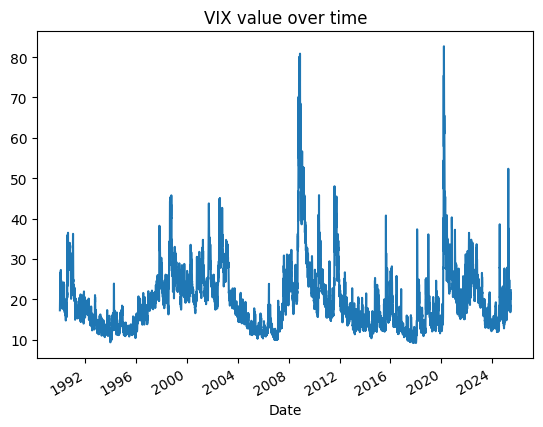

In [89]:
# Static graphs: hard to zoom in and get the exact dates of spikes
vix['Close'].plot.line(title = "VIX value over time")

In [90]:
# Dynamic visualisation of VIX prices
fig = px.line(vix,
              x=vix.index,
              y="Close",
              title='VIX over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

In [91]:
# GOLD
# WEB: https://finance.yahoo.com/quote/GC%3DF

ticker_obj = yf.Ticker("GC=F")

gold = ticker_obj.history(
                     period = "max",
                     interval = "1d")

In [92]:
gold.tail(1)

Open         High          Low        Close  \
Date                                                                            
2025-06-19 00:00:00-04:00  3387.100098  3405.199951  3363.600098  3384.399902   

                           Volume  Dividends  Stock Splits  
Date                                                        
2025-06-19 00:00:00-04:00  114667        0.0           0.0

In [93]:
gold_to_merge = get_growth_df(gold,'gold')
gold_to_merge.tail(2)

growth_gold_1d  growth_gold_3d  growth_gold_7d  \
Date                                                                        
2025-06-18 00:00:00-04:00        1.000945        0.987934        1.017316   
2025-06-19 00:00:00-04:00        0.998407        0.996467        1.019121   

                           growth_gold_30d  growth_gold_90d  growth_gold_365d  
Date                                                                           
2025-06-18 00:00:00-04:00         0.993668         1.182227          1.659795  
2025-06-19 00:00:00-04:00         1.000887         1.161308          1.657070

In [94]:
# Dynamic visualisation of GOLD prices
fig = px.line(gold,
              x=gold.index,
              y="Close",
              title='GOLD over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

In [95]:
# WTI Crude Oil
# WEB: https://uk.finance.yahoo.com/quote/CL=F/

ticker_obj = yf.Ticker("CL=F")

crude_oil = ticker_obj.history(
                     period = "max",
                     interval = "1d")

In [96]:
crude_oil.tail(2)

Open       High        Low      Close  Volume  \
Date                                                                            
2025-06-18 00:00:00-04:00  75.610001  76.070000  72.940002  75.139999  154264   
2025-06-19 00:00:00-04:00  74.599998  77.580002  74.470001  77.349998    3055   

                           Dividends  Stock Splits  
Date                                                
2025-06-18 00:00:00-04:00        0.0           0.0  
2025-06-19 00:00:00-04:00        0.0           0.0

In [97]:
crude_oil_to_merge = get_growth_df(crude_oil,'wti_oil')
crude_oil_to_merge.tail(2)

growth_wti_oil_1d  growth_wti_oil_3d  \
Date                                                              
2025-06-18 00:00:00-04:00           1.004009           1.029597   
2025-06-19 00:00:00-04:00           1.029412           1.077748   

                           growth_wti_oil_7d  growth_wti_oil_30d  \
Date                                                               
2025-06-18 00:00:00-04:00           1.150865            1.271620   
2025-06-19 00:00:00-04:00           1.190366            1.332013   

                           growth_wti_oil_90d  growth_wti_oil_365d  
Date                                                                
2025-06-18 00:00:00-04:00            1.058310             1.040864  
2025-06-19 00:00:00-04:00            1.069552             1.047961

In [98]:
# Dynamic visualisation
fig = px.line(crude_oil,
              x=crude_oil.index,
              y="Close",
              title='WTI Crude Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

In [99]:
# Brent Oil
# WEB: https://uk.finance.yahoo.com/quote/BZ=F/

ticker_obj = yf.Ticker("BZ=F")

# brent_oil = yf.download(tickers = "BZ=F",
#                      period = "max",
#                      interval = "1d")

brent_oil = ticker_obj.history(
                     period = "max",
                     interval = "1d")

brent_oil.tail(2)

Open       High        Low      Close  Volume  \
Date                                                                            
2025-06-18 00:00:00-04:00  77.190002  77.430000  74.440002  76.699997   88748   
2025-06-19 00:00:00-04:00  76.120003  79.019997  75.680000  78.699997   30368   

                           Dividends  Stock Splits  
Date                                                
2025-06-18 00:00:00-04:00        0.0           0.0  
2025-06-19 00:00:00-04:00        0.0           0.0

In [100]:
brent_oil_to_merge = get_growth_df(brent_oil,'brent_oil')
brent_oil_to_merge.tail(2)

growth_brent_oil_1d  growth_brent_oil_3d  \
Date                                                                  
2025-06-18 00:00:00-04:00             1.003270             1.033275   
2025-06-19 00:00:00-04:00             1.026076             1.074696   

                           growth_brent_oil_7d  growth_brent_oil_30d  \
Date                                                                   
2025-06-18 00:00:00-04:00             1.144093              1.234111   
2025-06-19 00:00:00-04:00             1.176910              1.287631   

                           growth_brent_oil_90d  growth_brent_oil_365d  
Date                                                                    
2025-06-18 00:00:00-04:00              1.027324               0.988529  
2025-06-19 00:00:00-04:00              1.037301               0.999238

In [101]:
# Dynamic visualisation
fig = px.line(brent_oil,
              x=brent_oil.index,
              y="Close",
              title='Brent Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()


In [102]:
# Bitcoin prices: BTC_USD
# https://finance.yahoo.com/quote/BTC-USD/

ticker_obj = yf.Ticker("BTC-USD")

btc_usd =  ticker_obj.history(
                     period = "max",
                     interval = "1d")

btc_usd.tail(2)

Open           High            Low  \
Date                                                                     
2025-06-18 00:00:00+00:00  104602.070312  105581.851562  103602.265625   
2025-06-19 00:00:00+00:00  104908.757812  105217.031250  104180.101562   

                                   Close       Volume  Dividends  Stock Splits  
Date                                                                            
2025-06-18 00:00:00+00:00  104883.328125  47318089133        0.0           0.0  
2025-06-19 00:00:00+00:00  104189.945312  40880439296        0.0           0.0

In [103]:
btc_usd_to_merge = get_growth_df(btc_usd,'btc_usd')
btc_usd_to_merge.tail(2)

growth_btc_usd_1d  growth_btc_usd_3d  \
Date                                                              
2025-06-18 00:00:00+00:00           1.002698           0.993665   
2025-06-19 00:00:00+00:00           0.993389           0.975591   

                           growth_btc_usd_7d  growth_btc_usd_30d  \
Date                                                               
2025-06-18 00:00:00+00:00           0.965007            0.993155   
2025-06-19 00:00:00+00:00           0.983582            0.975643   

                           growth_btc_usd_90d  growth_btc_usd_365d  
Date                                                                
2025-06-18 00:00:00+00:00            1.246131             1.610103  
2025-06-19 00:00:00+00:00            1.239718             1.603902

In [104]:
# Dynamic visualisation
fig = px.line(btc_usd,
              x=btc_usd.index,
              y="Close",
              title='Bitcoin price daily')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

In [106]:
#!pip install eurostat

# https://pypi.org/project/eurostat/
# https://ec.europa.eu/eurostat/web/main/data/database

In [ ]:
# import eurostat

# LONG WAIT TIME ~15 min, unless you filter data

# https://ec.europa.eu/eurostat/cache/metadata/en/irt_euryld_esms.htm
  # Euro yield curves (irt_euryld)
  # Reference Metadata in Euro SDMX Metadata Structure (ESMS)
  # Compiling agency: Eurostat, the statistical office of the European Uni

# the service is slow, you need to specify addtional params : https://pypi.org/project/eurostat/0.2.3/

#filter_pars = {'startPeriod':'2025-05-01', 'endPeriod':'2025-06-18'}

#code = 'irt_euryld_d'
#eurostat_euro_yield_df = eurostat.get_data_df(code, flags=True, filter_pars=filter_pars,  verbose=True)

Download progress: 100.0%



In [107]:
#eurostat_euro_yield_df.info()

In [108]:
#eurostat_euro_yield_df.head()

In [109]:
#eurostat_euro_yield_df['bonds'].value_counts()

In [110]:
#eurostat_euro_yield_df['maturity'].value_counts()

In [111]:
#eurostat_euro_yield_df['yld_curv'].value_counts()

In [112]:
#eurostat_euro_yield_df

In [113]:
# Visual graph: https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html
#FILTER = (eurostat_euro_yield_df.yld_curv=='SPOT_RT')& (eurostat_euro_yield_df.bonds=='CGB_EA_AAA')
#filtered_eurostat_euro_yield_df = eurostat_euro_yield_df[FILTER]

In [114]:
#filtered_eurostat_euro_yield_df.sort_values(by='maturity')[['maturity','2025-05-05_value']].head(20)

In [115]:
#filtered_eurostat_euro_yield_df.sort_values(by='maturity')[['maturity','2025-05-29_value']].head(20)

In [116]:
#import re

#def extract_numbers(input_string):
#    y_match = re.search(r'Y(\d+)', input_string)
#    m_match = re.search(r'M(\d+)', input_string)

#    y_number = int(y_match.group(1)) if y_match else 0
#    m_number = int(m_match.group(1)) if m_match else 0

#    return y_number*12 + m_number

# Examples
#examples = ["Y10_M2", "M3", "Y1"]
#for example in examples:
#    res = extract_numbers(example)
#    print(f"{example} ==> {res}")

In [ ]:
# define new field: "maturity in months"
#filtered_eurostat_euro_yield_df.loc[:,'maturity_in_months'] = filtered_eurostat_euro_yield_df.maturity.apply(lambda x:extract_numbers(x))

In [117]:
#filtered_eurostat_euro_yield_df.sort_values(by='maturity_in_months')[['maturity','maturity_in_months','2025-05-29_value']].head(20)

In [ ]:
#filtered_eurostat_euro_yield_df.loc[:,'maturity_in_years'] = filtered_eurostat_euro_yield_df.maturity_in_months/12.0

In [118]:
# exactly the same as on the Web:  https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html
#filtered_eurostat_euro_yield_df \
#  .sort_values(by='maturity_in_months')[['maturity_in_years','2025-05-29_value']] \
#  .plot.line(x='maturity_in_years',
#            y='2025-05-29_value',
#            title='AAA rated bonds spot yield curve')

#### Merge All Data into a Dataframe

In [119]:
# merge with dax_daily_to_merge
dax_daily_to_merge.tail(1)

growth_dax_1d  growth_dax_3d  growth_dax_7d  \
Date                                                                     
2025-06-19 00:00:00+02:00       0.989135        0.97322       0.961518   

                           growth_dax_30d  growth_dax_90d  growth_dax_365d  
Date                                                                        
2025-06-19 00:00:00+02:00        0.987658        1.052607         1.381949

In [120]:
dax_daily_to_merge.index = dax_daily_to_merge.index.tz_localize(None)

In [121]:
m2 = pd.merge(merged_df_with_tech_ind,
              dax_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [122]:
m2.tail(1)

Open    High          Low        Close     Volume  Dividends  \
5704  3607.0  3643.0  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year  Month  ...  cdltristar cdlunique3river  \
5704           0.0  LT.NS  2025      6  ...           0               0   

      cdlupsidegap2crows  cdlxsidegap3methods  growth_dax_1d  growth_dax_3d  \
5704                   0                    0       0.989135        0.97322   

      growth_dax_7d  growth_dax_30d  growth_dax_90d  growth_dax_365d  
5704       0.961518        0.987658        1.052607         1.381949  

[1 rows x 151 columns]

In [123]:
# check the same number of records, but columns increased
m2.shape

(230374, 151)

In [124]:
# merge with dax_daily_to_merge
snp500_to_merge.tail(1)

growth_snp500_1d  growth_snp500_3d  \
Date                                                            
2025-06-18 00:00:00-04:00          0.999691          1.000652   

                           growth_snp500_7d  growth_snp500_30d  \
Date                                                             
2025-06-18 00:00:00-04:00          0.995836           1.066696   

                           growth_snp500_90d  growth_snp500_365d  
Date                                                              
2025-06-18 00:00:00-04:00           0.992512            1.271225

In [125]:
snp500_to_merge.index = snp500_to_merge.index.tz_localize(None)

In [126]:
m3 = pd.merge(m2,
              snp500_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [127]:
m3.tail(1)

Open    High          Low        Close     Volume  Dividends  \
5704  3607.0  3643.0  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year  Month  ...  growth_dax_7d growth_dax_30d  \
5704           0.0  LT.NS  2025      6  ...       0.961518       0.987658   

      growth_dax_90d  growth_dax_365d  growth_snp500_1d  growth_snp500_3d  \
5704        1.052607         1.381949               NaN               NaN   

      growth_snp500_7d  growth_snp500_30d  growth_snp500_90d  \
5704               NaN                NaN                NaN   

      growth_snp500_365d  
5704                 NaN  

[1 rows x 157 columns]

In [128]:
m3.shape

(230374, 157)

In [129]:
dji_daily_to_merge.index = dji_daily_to_merge.index.tz_localize(None)

In [130]:
m4 = pd.merge(m3,
              dji_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [131]:
m4.shape

(230374, 163)

In [132]:
m4.tail(1)

Open    High          Low        Close     Volume  Dividends  \
5704  3607.0  3643.0  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year  Month  ...  growth_snp500_7d  \
5704           0.0  LT.NS  2025      6  ...               NaN   

     growth_snp500_30d  growth_snp500_90d  growth_snp500_365d  growth_dji_1d  \
5704               NaN                NaN                 NaN            NaN   

      growth_dji_3d  growth_dji_7d  growth_dji_30d  growth_dji_90d  \
5704            NaN            NaN             NaN             NaN   

      growth_dji_365d  
5704              NaN  

[1 rows x 163 columns]

In [133]:
epi_etf_daily_to_merge.index = epi_etf_daily_to_merge.index.tz_localize(None)

In [134]:
m5 = pd.merge(m4,
              epi_etf_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [135]:
m5.shape

(230374, 169)

In [136]:
# define quarter as the first date of qtr
m5['Quarter'] = m5['Date'].dt.to_period('Q').dt.to_timestamp()
m5['Quarter']

0      1986-01-01
1      1986-01-01
2      1986-01-01
3      1986-01-01
4      1986-01-01
          ...    
5700   2025-04-01
5701   2025-04-01
5702   2025-04-01
5703   2025-04-01
5704   2025-04-01
Name: Quarter, Length: 230374, dtype: datetime64[ns]

In [137]:
gdppot_to_merge.tail(1)

gdppot_us_yoy  gdppot_us_qoq
DATE                                    
2025-04-01       0.023029       0.005716

In [138]:
m6 = pd.merge(m5,
              gdppot_to_merge,
              how='left',
              left_on='Quarter',
              right_index=True,
              validate = "many_to_one"
              )

In [139]:
m6.tail(2)

Open         High          Low        Close     Volume  Dividends  \
5703  3622.0  3639.100098  3587.199951  3601.500000   743311.0        0.0   
5704  3607.0  3643.000000  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year  Month  ...  growth_dji_365d growth_epi_1d  \
5703           0.0  LT.NS  2025      6  ...         1.126675      0.998477   
5704           0.0  LT.NS  2025      6  ...              NaN           NaN   

      growth_epi_3d  growth_epi_7d  growth_epi_30d  growth_epi_90d  \
5703       0.991571       0.975755        1.010795        1.064995   
5704            NaN            NaN             NaN             NaN   

      growth_epi_365d    Quarter  gdppot_us_yoy  gdppot_us_qoq  
5703          1.12307 2025-04-01       0.023029       0.005716  
5704              NaN 2025-04-01       0.023029       0.005716  

[2 rows x 172 columns]

In [140]:
m6.shape

(230374, 172)

In [141]:
m6['Month'] = m6['Date'].dt.to_period('M').dt.to_timestamp()
m6['Month']

0      1986-03-01
1      1986-03-01
2      1986-03-01
3      1986-03-01
4      1986-03-01
          ...    
5700   2025-06-01
5701   2025-06-01
5702   2025-06-01
5703   2025-06-01
5704   2025-06-01
Name: Month, Length: 230374, dtype: datetime64[ns]

In [142]:
cpilfesl_to_merge.tail(1)

cpi_core_yoy  cpi_core_mom
DATE                                  
2025-05-01      0.027671      0.001299

In [143]:
m7 = pd.merge(m6,
              cpilfesl_to_merge,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )

In [144]:
# PROBLEM! Last month is not defined
m7.tail(1)

Open    High          Low        Close     Volume  Dividends  \
5704  3607.0  3643.0  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_3d growth_epi_7d  \
5704           0.0  LT.NS  2025 2025-06-01  ...            NaN           NaN   

      growth_epi_30d  growth_epi_90d  growth_epi_365d    Quarter  \
5704             NaN             NaN              NaN 2025-04-01   

      gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  
5704       0.023029       0.005716           NaN           NaN  

[1 rows x 174 columns]

In [145]:
fields_to_fill = ['cpi_core_yoy',	'cpi_core_mom']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m7[field] = m7[field].ffill()

In [146]:
m7.tail(1)

Open    High          Low        Close     Volume  Dividends  \
5704  3607.0  3643.0  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_3d growth_epi_7d  \
5704           0.0  LT.NS  2025 2025-06-01  ...            NaN           NaN   

      growth_epi_30d  growth_epi_90d  growth_epi_365d    Quarter  \
5704             NaN             NaN              NaN 2025-04-01   

      gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  
5704       0.023029       0.005716      0.027671      0.001299  

[1 rows x 174 columns]

In [147]:
fedfunds.tail(1)

FEDFUNDS
DATE                
2025-05-01      4.33

In [148]:
m8 = pd.merge(m7,
              fedfunds,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )

In [149]:
m8.tail(1)

Open    High          Low        Close     Volume  Dividends  \
5704  3607.0  3643.0  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_7d growth_epi_30d  \
5704           0.0  LT.NS  2025 2025-06-01  ...            NaN            NaN   

      growth_epi_90d  growth_epi_365d    Quarter  gdppot_us_yoy  \
5704             NaN              NaN 2025-04-01       0.023029   

      gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  
5704       0.005716      0.027671      0.001299       NaN  

[1 rows x 175 columns]

In [150]:
fields_to_fill = ['FEDFUNDS']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m8[field] = m8[field].ffill()

In [151]:
m8.tail(1)

Open    High          Low        Close     Volume  Dividends  \
5704  3607.0  3643.0  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_7d growth_epi_30d  \
5704           0.0  LT.NS  2025 2025-06-01  ...            NaN            NaN   

      growth_epi_90d  growth_epi_365d    Quarter  gdppot_us_yoy  \
5704             NaN              NaN 2025-04-01       0.023029   

      gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  
5704       0.005716      0.027671      0.001299      4.33  

[1 rows x 175 columns]

In [152]:
dgs1.tail(1)

DGS1
DATE            
2025-06-17   4.1

In [153]:
m9 = pd.merge(m8,
              dgs1,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [154]:
# fix last day later
m9.tail(2)

Open         High          Low        Close     Volume  Dividends  \
5703  3622.0  3639.100098  3587.199951  3601.500000   743311.0        0.0   
5704  3607.0  3643.000000  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_30d  \
5703           0.0  LT.NS  2025 2025-06-01  ...        1.010795   
5704           0.0  LT.NS  2025 2025-06-01  ...             NaN   

     growth_epi_90d  growth_epi_365d    Quarter  gdppot_us_yoy  gdppot_us_qoq  \
5703       1.064995          1.12307 2025-04-01       0.023029       0.005716   
5704            NaN              NaN 2025-04-01       0.023029       0.005716   

      cpi_core_yoy  cpi_core_mom  FEDFUNDS  DGS1  
5703      0.027671      0.001299      4.33   NaN  
5704      0.027671      0.001299      4.33   NaN  

[2 rows x 176 columns]

In [155]:
m10 = pd.merge(m9,
              dgs5,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [156]:
# fix last day later
m10.tail(2)

Open         High          Low        Close     Volume  Dividends  \
5703  3622.0  3639.100098  3587.199951  3601.500000   743311.0        0.0   
5704  3607.0  3643.000000  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_90d  \
5703           0.0  LT.NS  2025 2025-06-01  ...        1.064995   
5704           0.0  LT.NS  2025 2025-06-01  ...             NaN   

     growth_epi_365d    Quarter  gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  \
5703         1.12307 2025-04-01       0.023029       0.005716      0.027671   
5704             NaN 2025-04-01       0.023029       0.005716      0.027671   

      cpi_core_mom  FEDFUNDS  DGS1  DGS5  
5703      0.001299      4.33   NaN   NaN  
5704      0.001299      4.33   NaN   NaN  

[2 rows x 177 columns]

In [157]:
m11 = pd.merge(m10,
              dgs10,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [158]:
m11.tail(2)

Open         High          Low        Close     Volume  Dividends  \
5703  3622.0  3639.100098  3587.199951  3601.500000   743311.0        0.0   
5704  3607.0  3643.000000  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_365d    Quarter  \
5703           0.0  LT.NS  2025 2025-06-01  ...          1.12307 2025-04-01   
5704           0.0  LT.NS  2025 2025-06-01  ...              NaN 2025-04-01   

      gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  \
5703       0.023029       0.005716      0.027671      0.001299      4.33   
5704       0.023029       0.005716      0.027671      0.001299      4.33   

      DGS1  DGS5  DGS10  
5703   NaN   NaN    NaN  
5704   NaN   NaN    NaN  

[2 rows x 178 columns]

In [159]:
vix_to_merge

Date
1990-01-02 00:00:00-06:00    17.240000
1990-01-03 00:00:00-06:00    18.190001
1990-01-04 00:00:00-06:00    19.219999
1990-01-05 00:00:00-06:00    20.110001
1990-01-08 00:00:00-06:00    20.260000
                               ...    
2025-06-13 00:00:00-05:00    20.820000
2025-06-16 00:00:00-05:00    19.110001
2025-06-17 00:00:00-05:00    21.600000
2025-06-18 00:00:00-05:00    20.139999
2025-06-19 00:00:00-05:00    22.240000
Name: Close, Length: 8933, dtype: float64

In [160]:
vix_to_merge.index = vix_to_merge.index.tz_localize(None)

In [161]:
m12 = pd.merge(m11,
              vix_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [162]:
m12.tail(2)

Open         High          Low      Close_x     Volume  Dividends  \
5703  3622.0  3639.100098  3587.199951  3601.500000   743311.0        0.0   
5704  3607.0  3643.000000  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...    Quarter gdppot_us_yoy  \
5703           0.0  LT.NS  2025 2025-06-01  ... 2025-04-01      0.023029   
5704           0.0  LT.NS  2025 2025-06-01  ... 2025-04-01      0.023029   

      gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  DGS1  DGS5  DGS10  \
5703       0.005716      0.027671      0.001299      4.33   NaN   NaN    NaN   
5704       0.005716      0.027671      0.001299      4.33   NaN   NaN    NaN   

        Close_y  
5703  20.139999  
5704  22.240000  

[2 rows x 179 columns]

In [163]:
gold_to_merge.tail(2)

growth_gold_1d  growth_gold_3d  growth_gold_7d  \
Date                                                                        
2025-06-18 00:00:00-04:00        1.000945        0.987934        1.017316   
2025-06-19 00:00:00-04:00        0.998407        0.996467        1.019121   

                           growth_gold_30d  growth_gold_90d  growth_gold_365d  
Date                                                                           
2025-06-18 00:00:00-04:00         0.993668         1.182227          1.659795  
2025-06-19 00:00:00-04:00         1.000887         1.161308          1.657070

In [164]:
gold_to_merge.index = gold_to_merge.index.tz_localize(None)

In [165]:
m13 = pd.merge(m12,
              gold_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [166]:
m13.tail(2)

Open         High          Low      Close_x     Volume  Dividends  \
5703  3622.0  3639.100098  3587.199951  3601.500000   743311.0        0.0   
5704  3607.0  3643.000000  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...  DGS1 DGS5  DGS10    Close_y  \
5703           0.0  LT.NS  2025 2025-06-01  ...   NaN  NaN    NaN  20.139999   
5704           0.0  LT.NS  2025 2025-06-01  ...   NaN  NaN    NaN  22.240000   

      growth_gold_1d  growth_gold_3d  growth_gold_7d  growth_gold_30d  \
5703        1.000945        0.987934        1.017316         0.993668   
5704        0.998407        0.996467        1.019121         1.000887   

      growth_gold_90d  growth_gold_365d  
5703         1.182227          1.659795  
5704         1.161308          1.657070  

[2 rows x 185 columns]

In [167]:
crude_oil_to_merge.index = crude_oil_to_merge.index.tz_localize(None)

In [168]:
m14 = pd.merge(m13,
              crude_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [169]:
m14.tail(2)

Open         High          Low      Close_x     Volume  Dividends  \
5703  3622.0  3639.100098  3587.199951  3601.500000   743311.0        0.0   
5704  3607.0  3643.000000  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_gold_7d  \
5703           0.0  LT.NS  2025 2025-06-01  ...        1.017316   
5704           0.0  LT.NS  2025 2025-06-01  ...        1.019121   

     growth_gold_30d  growth_gold_90d  growth_gold_365d  growth_wti_oil_1d  \
5703        0.993668         1.182227          1.659795           1.004009   
5704        1.000887         1.161308          1.657070           1.029412   

      growth_wti_oil_3d  growth_wti_oil_7d  growth_wti_oil_30d  \
5703           1.029597           1.150865            1.271620   
5704           1.077748           1.190366            1.332013   

      growth_wti_oil_90d  growth_wti_oil_365d  
5703            1.058310             1.040864  
5704            1.069552             1.047961  

[2 rows x 191 columns]

In [170]:
brent_oil_to_merge.index = brent_oil_to_merge.index.tz_localize(None)

In [171]:
m15 = pd.merge(m14,
              brent_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [172]:
m15.tail(2)

Open         High          Low      Close_x     Volume  Dividends  \
5703  3622.0  3639.100098  3587.199951  3601.500000   743311.0        0.0   
5704  3607.0  3643.000000  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_wti_oil_7d  \
5703           0.0  LT.NS  2025 2025-06-01  ...           1.150865   
5704           0.0  LT.NS  2025 2025-06-01  ...           1.190366   

     growth_wti_oil_30d  growth_wti_oil_90d  growth_wti_oil_365d  \
5703           1.271620            1.058310             1.040864   
5704           1.332013            1.069552             1.047961   

      growth_brent_oil_1d  growth_brent_oil_3d  growth_brent_oil_7d  \
5703             1.003270             1.033275             1.144093   
5704             1.026076             1.074696             1.176910   

      growth_brent_oil_30d  growth_brent_oil_90d  growth_brent_oil_365d  
5703              1.234111              1.027324               0.988529  
5704              1.287631              1.037301               0.999238  

[2 rows x 197 columns]

In [173]:
btc_usd_to_merge.index = btc_usd_to_merge.index.tz_localize(None)

In [174]:
m16 = pd.merge(m15,
              btc_usd_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [175]:
m16.tail(2)

Open         High          Low      Close_x     Volume  Dividends  \
5703  3622.0  3639.100098  3587.199951  3601.500000   743311.0        0.0   
5704  3607.0  3643.000000  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_brent_oil_7d  \
5703           0.0  LT.NS  2025 2025-06-01  ...             1.144093   
5704           0.0  LT.NS  2025 2025-06-01  ...             1.176910   

     growth_brent_oil_30d  growth_brent_oil_90d  growth_brent_oil_365d  \
5703             1.234111              1.027324               0.988529   
5704             1.287631              1.037301               0.999238   

      growth_btc_usd_1d  growth_btc_usd_3d  growth_btc_usd_7d  \
5703           1.002698           0.993665           0.965007   
5704           0.993389           0.975591           0.983582   

      growth_btc_usd_30d  growth_btc_usd_90d  growth_btc_usd_365d  
5703            0.993155            1.246131             1.610103  
5704            0.975643            1.239718             1.603902  

[2 rows x 203 columns]

In [176]:
fields_to_fill = ['gdppot_us_yoy','gdppot_us_qoq','cpi_core_yoy','cpi_core_mom','FEDFUNDS','DGS1','DGS5','DGS10']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m16[field] = m16[field].ffill()

In [177]:
m16.tail(2)

Open         High          Low      Close_x     Volume  Dividends  \
5703  3622.0  3639.100098  3587.199951  3601.500000   743311.0        0.0   
5704  3607.0  3643.000000  3591.100098  3621.100098  1580686.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_brent_oil_7d  \
5703           0.0  LT.NS  2025 2025-06-01  ...             1.144093   
5704           0.0  LT.NS  2025 2025-06-01  ...             1.176910   

     growth_brent_oil_30d  growth_brent_oil_90d  growth_brent_oil_365d  \
5703             1.234111              1.027324               0.988529   
5704             1.287631              1.037301               0.999238   

      growth_btc_usd_1d  growth_btc_usd_3d  growth_btc_usd_7d  \
5703           1.002698           0.993665           0.965007   
5704           0.993389           0.975591           0.983582   

      growth_btc_usd_30d  growth_btc_usd_90d  growth_btc_usd_365d  
5703            0.993155            1.246131             1.610103  
5704            0.975643            1.239718             1.603902  

[2 rows x 203 columns]

In [178]:
m16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230374 entries, 0 to 5704
Columns: 203 entries, Open to growth_btc_usd_365d
dtypes: datetime64[ns](3), float64(129), int32(64), int64(5), object(2)
memory usage: 302.3+ MB


In [179]:
date = m16.Date.max()
date_str = date.strftime('%Y_%m_%d')
print(date_str)

2025_06_19


In [180]:
m16.to_parquet(f'stocks_df_combined_{date_str}.parquet.brotli',
              compression='brotli')

In [182]:
m16.columns

Index(['Open', 'High', 'Low', 'Close_x', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker', 'Year', 'Month',
       ...
       'growth_brent_oil_7d', 'growth_brent_oil_30d', 'growth_brent_oil_90d',
       'growth_brent_oil_365d', 'growth_btc_usd_1d', 'growth_btc_usd_3d',
       'growth_btc_usd_7d', 'growth_btc_usd_30d', 'growth_btc_usd_90d',
       'growth_btc_usd_365d'],
      dtype='object', length=203)

Step 2:  IMPORTANT Please use this file to solve the Home Assignment (all next steps)

Download precomputed data using this snippet:

In [201]:
import gdown
import pandas as pd

file_id = "1grCTCzMZKY5sJRtdbLVCXg8JXA8VPyg-"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "data.parquet", quiet=False)
df = pd.read_parquet("data.parquet", engine="pyarrow")


Downloading...
From (original): https://drive.google.com/uc?id=1grCTCzMZKY5sJRtdbLVCXg8JXA8VPyg-
From (redirected): https://drive.google.com/uc?id=1grCTCzMZKY5sJRtdbLVCXg8JXA8VPyg-&confirm=t&uuid=73da2fb5-b5e4-4511-8072-bb7c54e33dab
To: /content/data.parquet
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 130M/130M [00:02<00:00, 63.9MB/s]


Step 3: **RSI Strategy Setup**:

RSI is already available in the dataset as a field.

The threshold for **oversold** is defined as RSI < 25.

In [202]:
df['rsi'].info()

<class 'pandas.core.series.Series'>
Index: 229932 entries, 0 to 5690
Series name: rsi
Non-Null Count   Dtype  
--------------   -----  
229470 non-null  float64
dtypes: float64(1)
memory usage: 3.5 MB


Step 4: Filter the dataset by RSI and date:

In [203]:
rsi_threshold = 25
selected_df = df[
    (df['rsi'] < rsi_threshold) &
    (df['Date'] >= '2000-01-01') &
    (df['Date'] <= '2025-06-01')
]

Step 5:
Calculate Net Profit Over 25 Years:

* Total number of trades: 1568

* For each trade, you invest $1000

* Use the 30-day forward return (growth_future_30d) to compute net earnings:

In [205]:
selected_df['growth_future_30d']

3668    0.985394
3669    0.972222
3680    0.964641
3681    1.005637
3682    0.981941
          ...   
4405    1.007871
4406    0.981580
4407    1.118479
4408    1.142111
4409    1.011231
Name: growth_future_30d, Length: 1568, dtype: float64

In [206]:
# net income with $1000 investment
net_income = 1000 * (selected_df['growth_future_30d'] - 1).sum()

In [207]:
float(net_income)

24295.523125248386

Final Answer:

What is the net income in $K (i.e., in thousands of dollars) that could be earned using this RSI-based oversold strategy from 2000‚Äì2025?

In [208]:
net_income_k = net_income / 1000
print(f"Net income in $K: {net_income_k:.2f}")

Net income in $K: 24.30


### Question 5

Ideas for identifying IPOs with positive future returns and building a more effective trading strategy for increased profitability:

* Predictive modelling: build a classification model to predict future returns using good feature engineering technique
* Use news sentiment, web traffic, or social media hype metrics (e.g., Reddit mentions) to assess demand.
* Use fundamentals if available: revenue growth, profitability (positive EBITDA), low debt-to-equity.
* Combine low RSI (e.g., < 30) with volume surges or MACD crossovers for timing entries on pullbacks.
* Use macro indicators (e.g., VIX, interest rate trends) to time entries.